In [1]:
import numpy as np
import pandas as pd 
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot') 

from sklearn.model_selection import train_test_split



from sklearn.model_selection import RandomizedSearchCV 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import metrics 
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv('UCI_Credit_Card.csv', delimiter = ',')
data_rec = pd.DataFrame()

column: 1


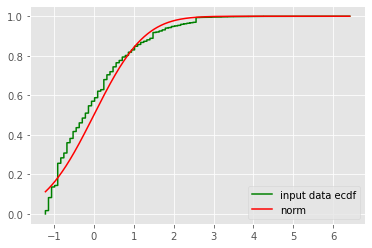

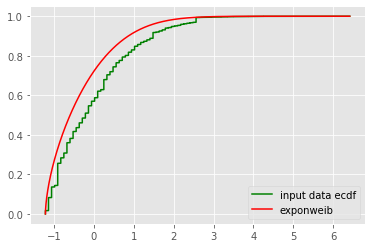

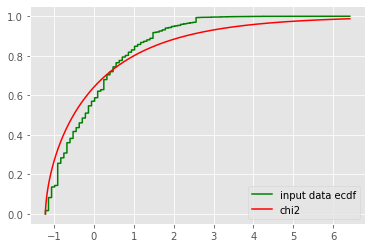

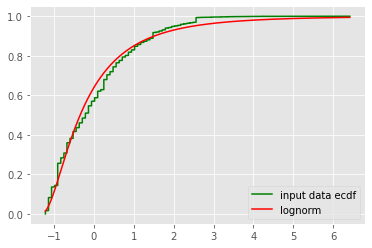

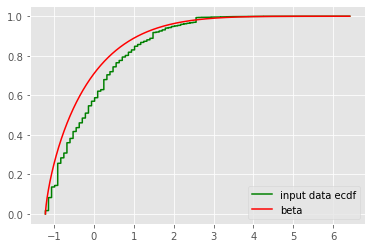

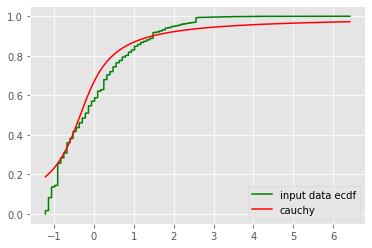

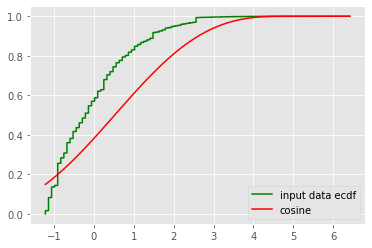

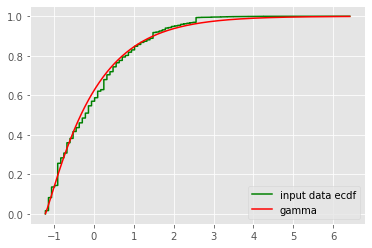

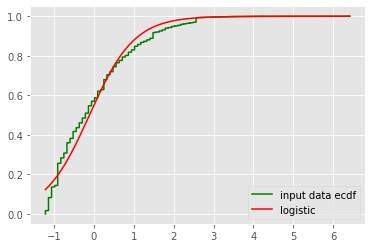

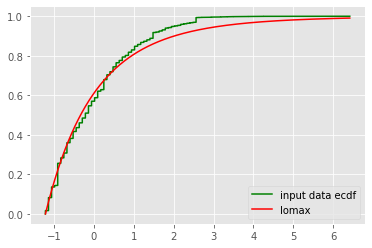

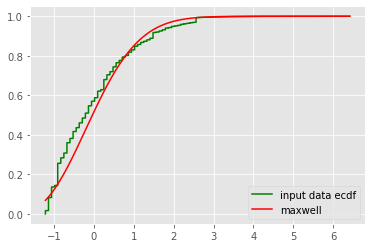

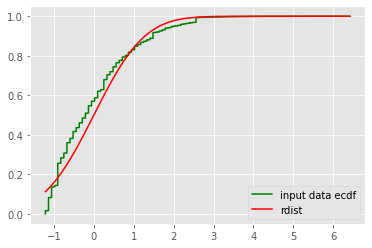

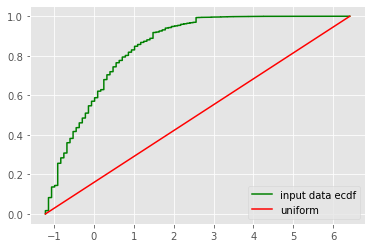

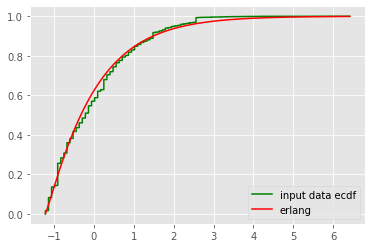

column: 2


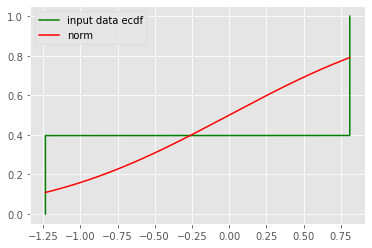

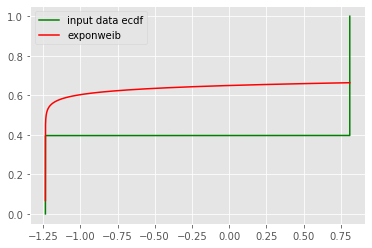

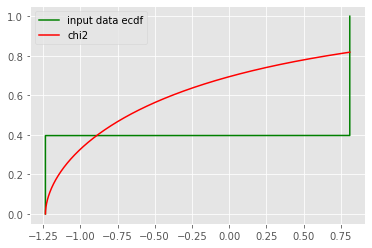

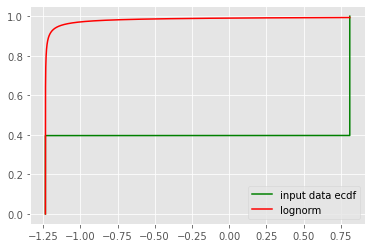

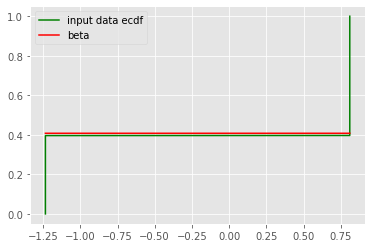

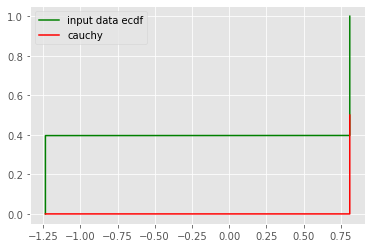

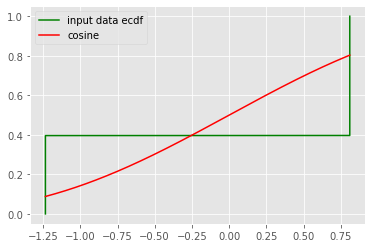

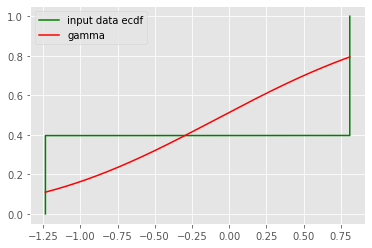

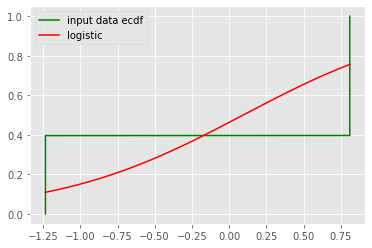

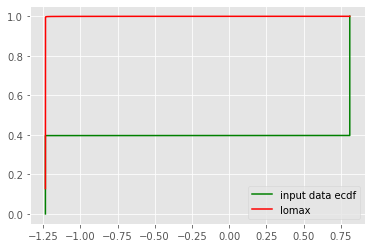

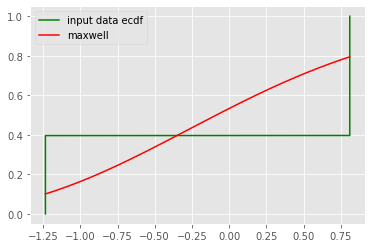

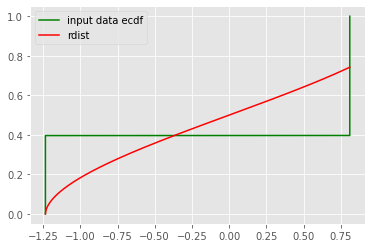

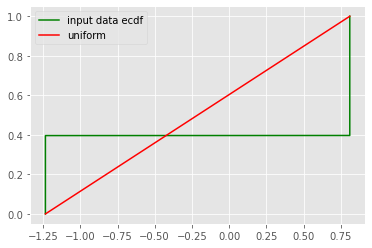

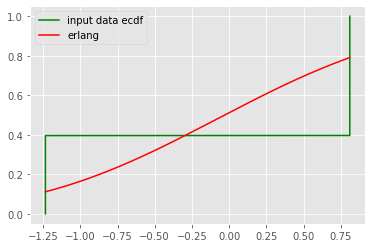

column: 3


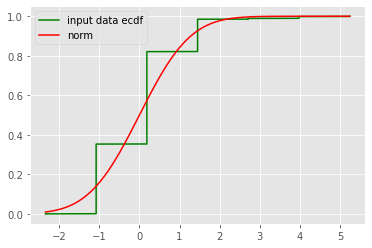

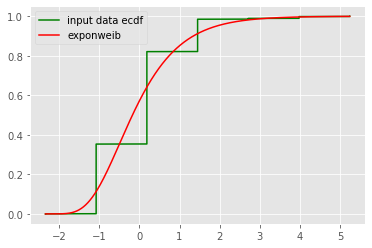

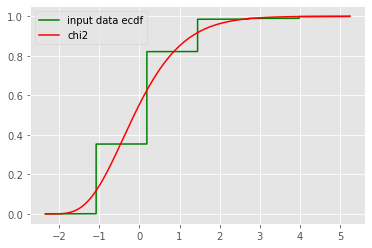

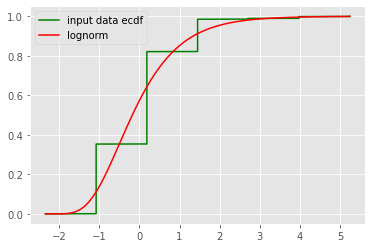

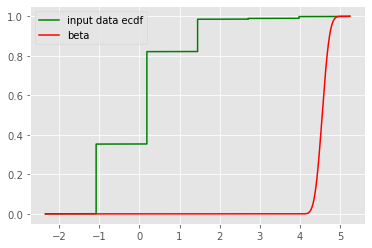

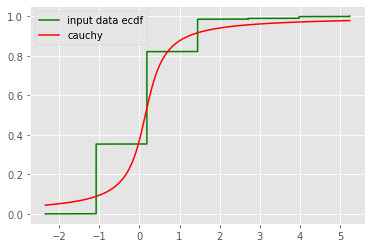

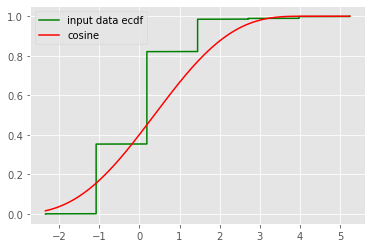

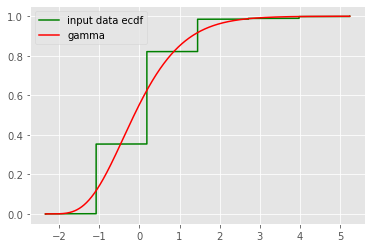

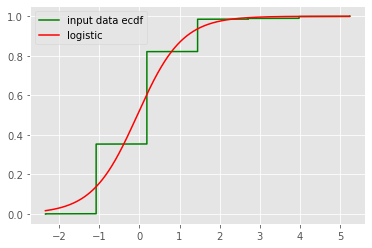

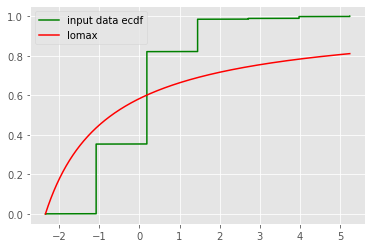

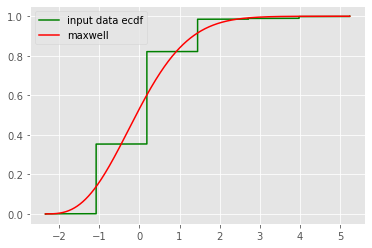

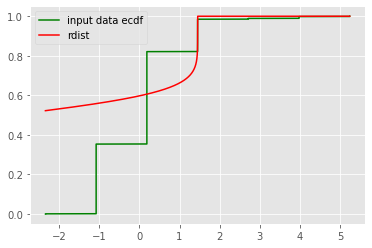

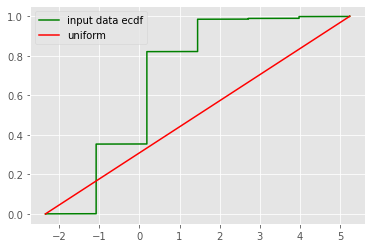

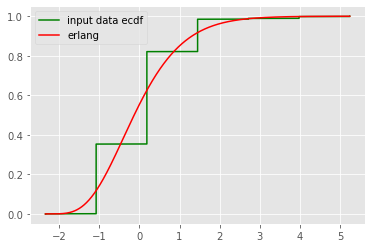

column: 4


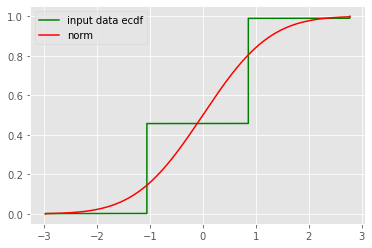

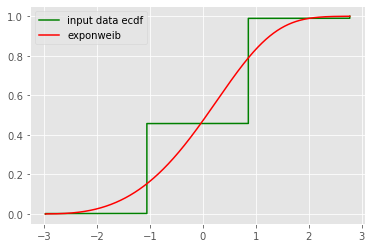

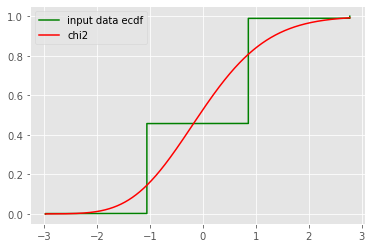

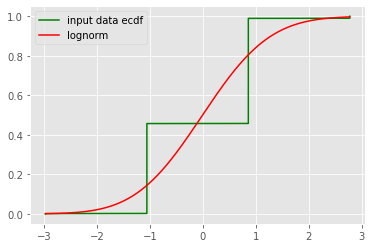

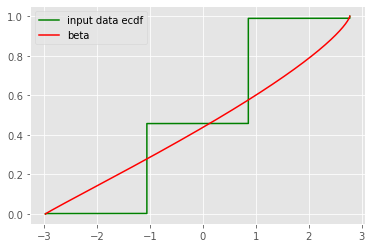

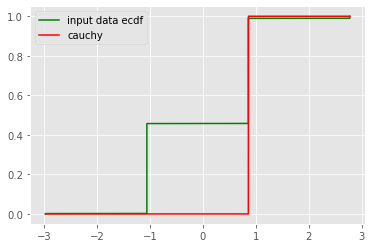

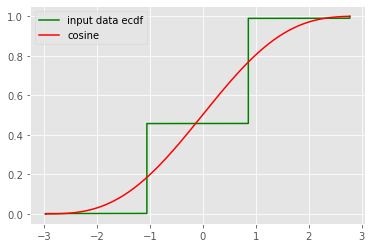

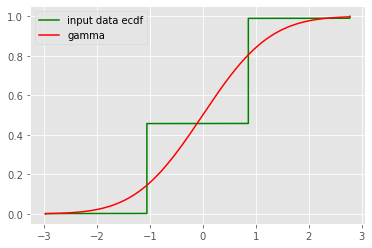

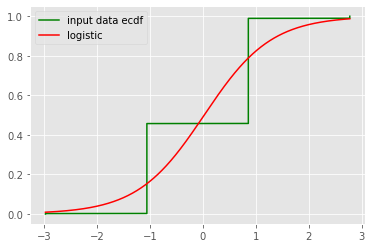

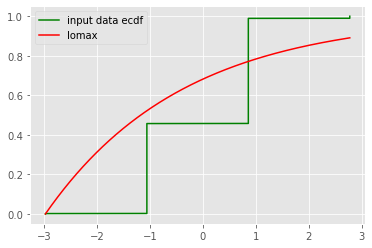

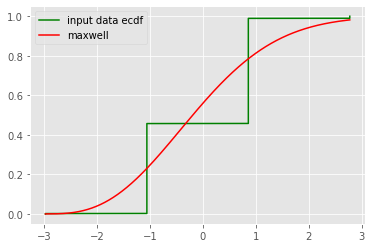

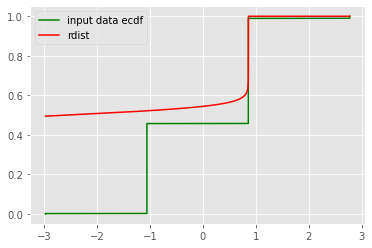

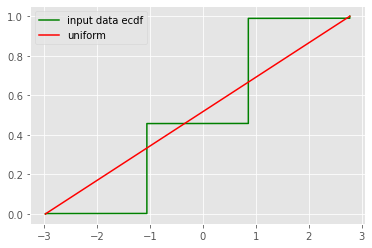

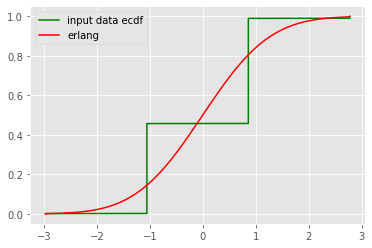

column: 5


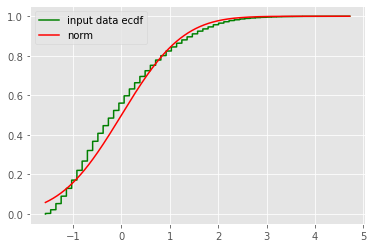

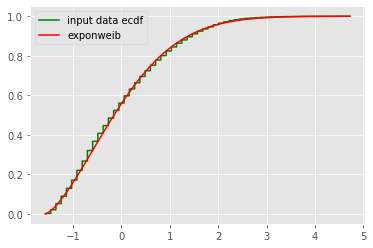

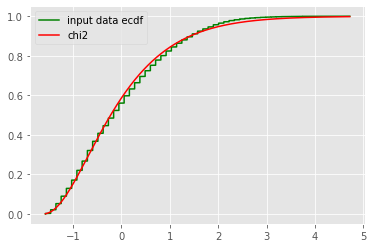

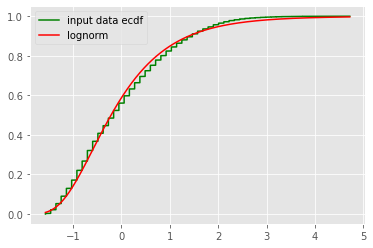

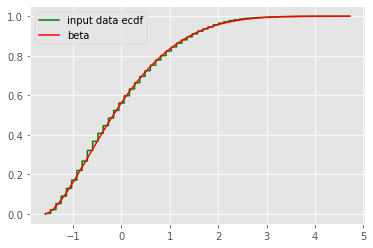

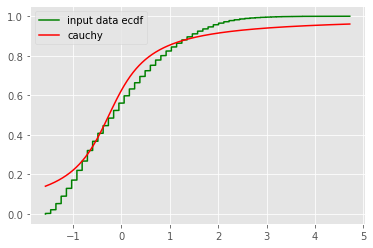

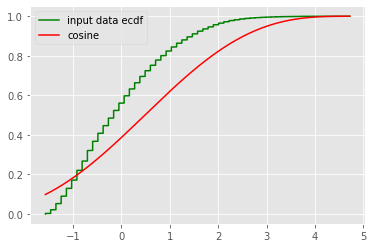

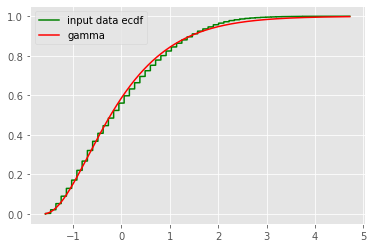

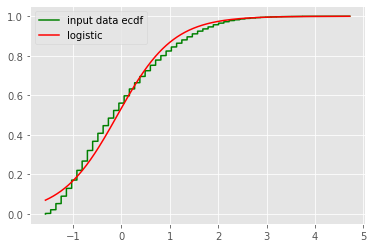

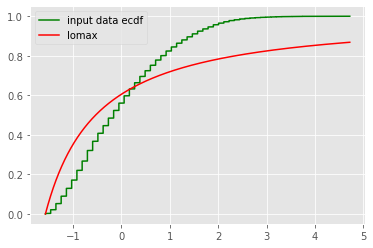

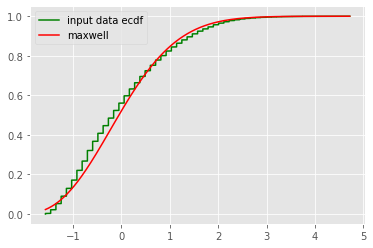

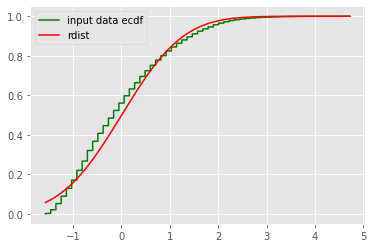

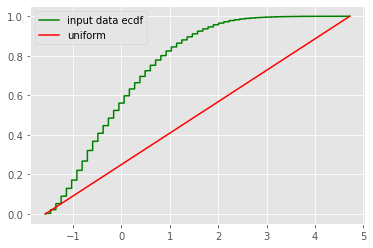

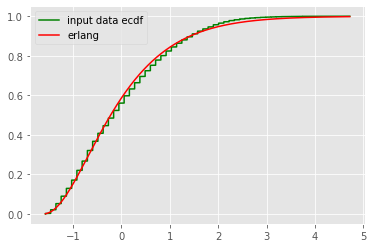

column: 6


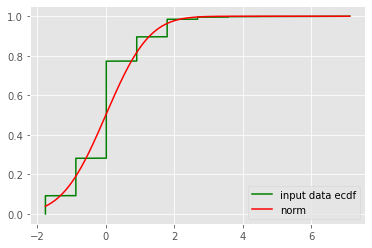

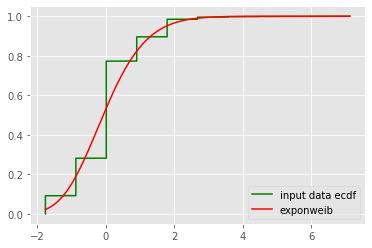

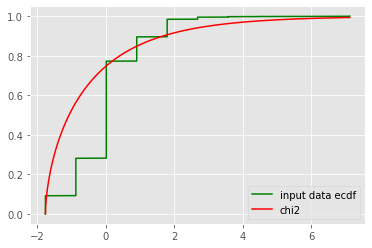

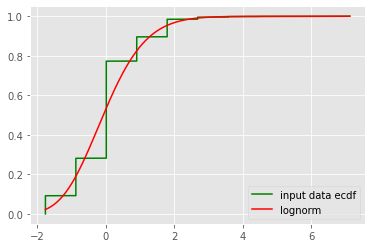

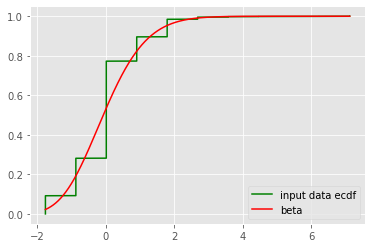

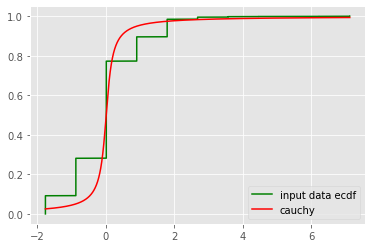

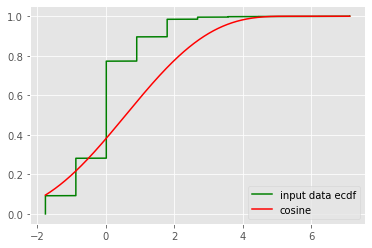

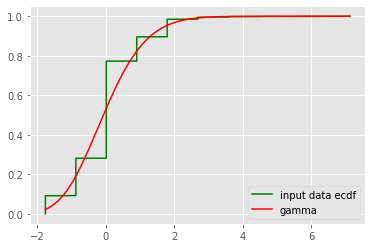

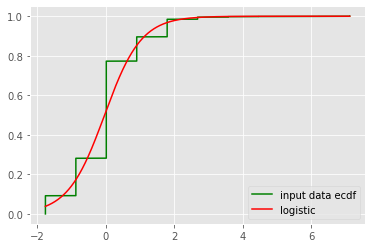

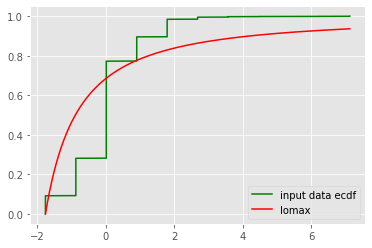

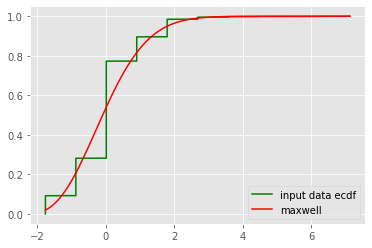

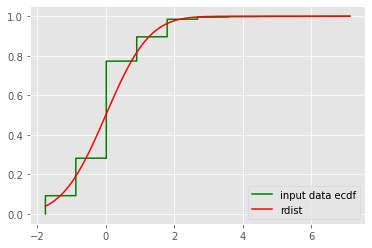

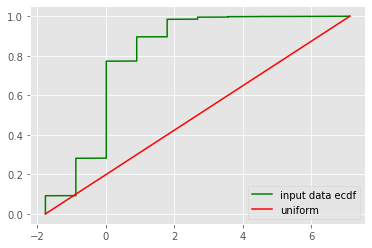

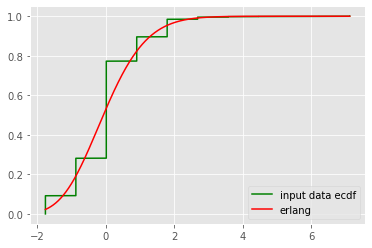

column: 7


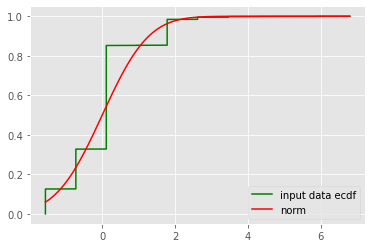

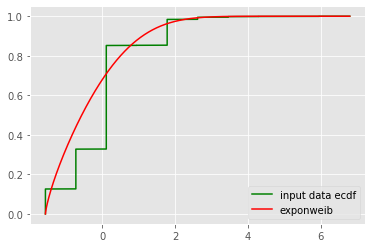

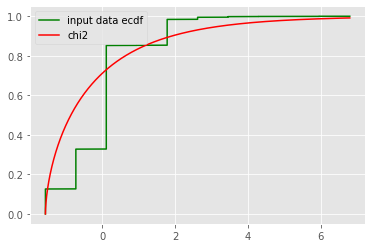

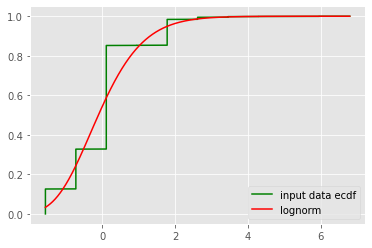

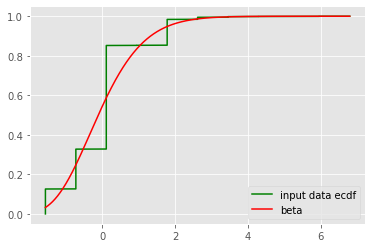

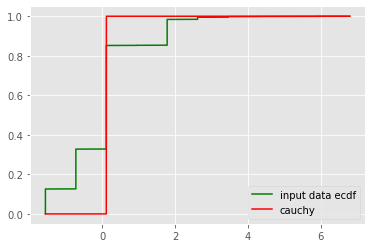

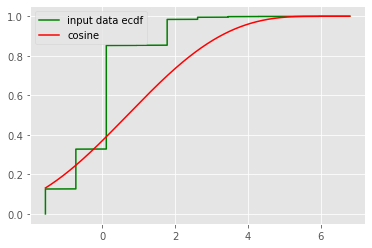

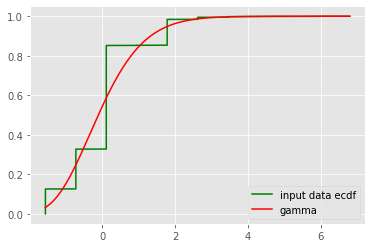

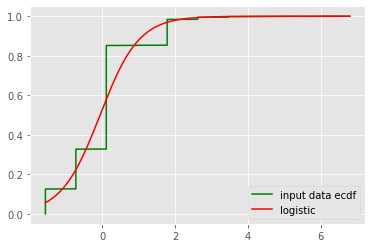

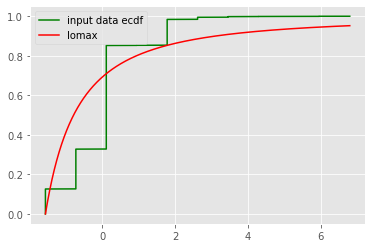

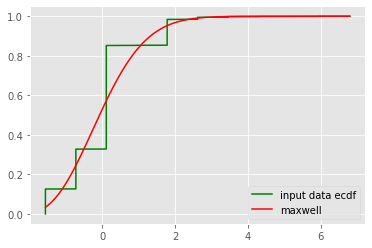

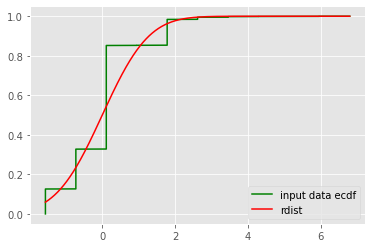

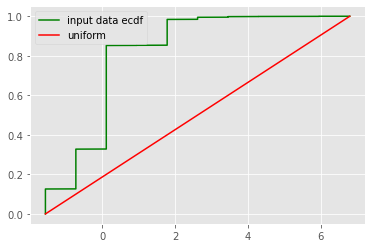

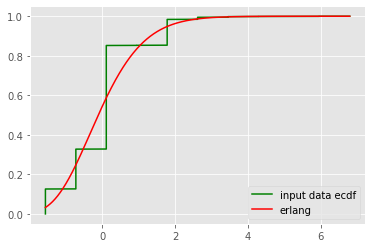

column: 8


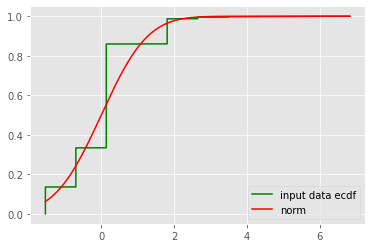

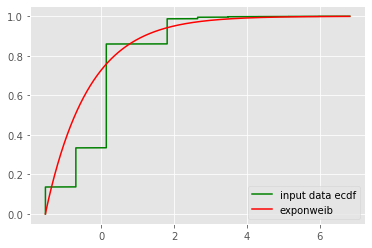

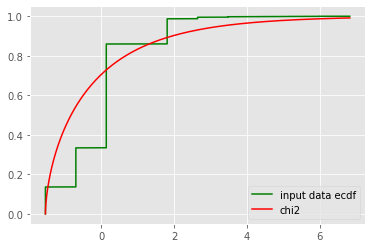

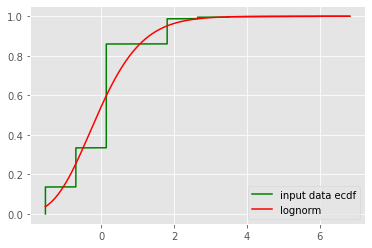

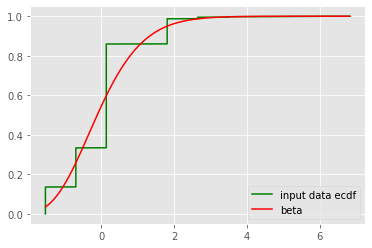

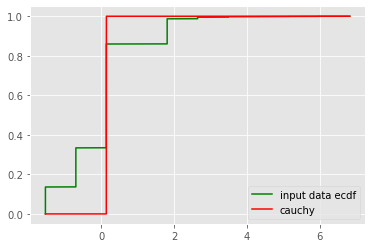

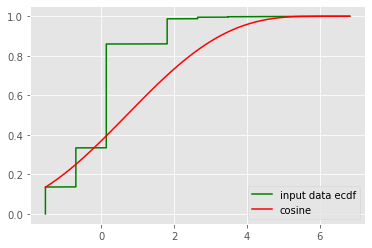

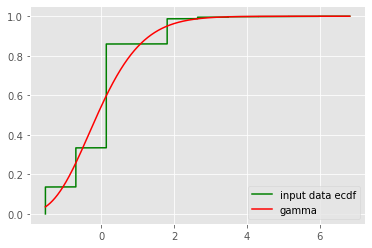

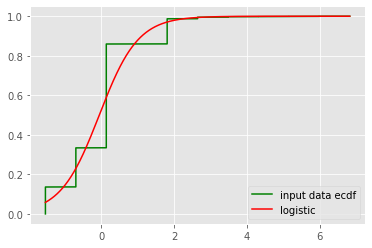

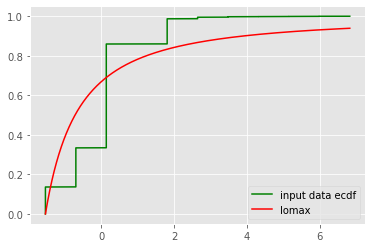

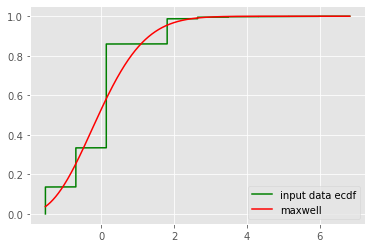

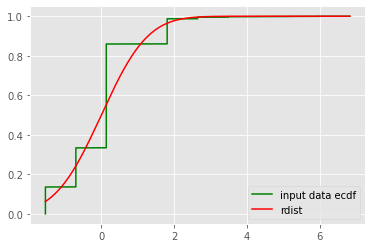

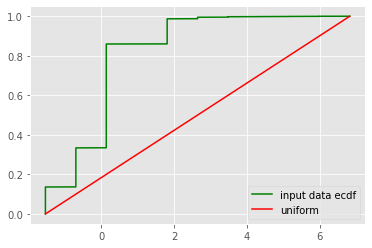

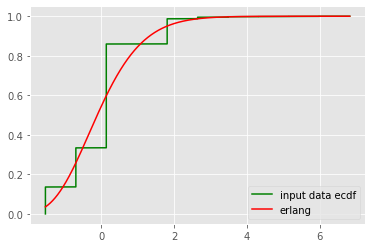

column: 9


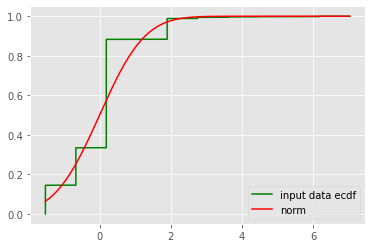

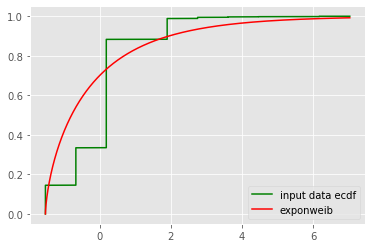

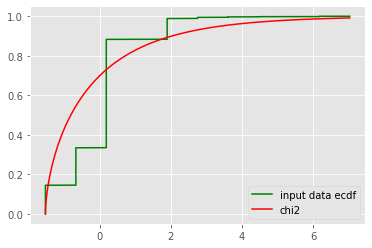

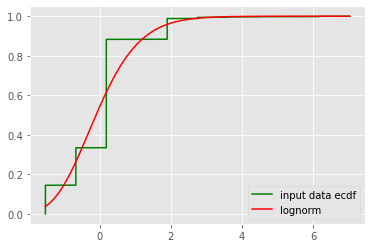

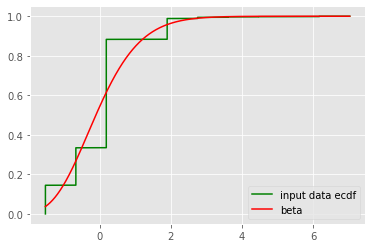

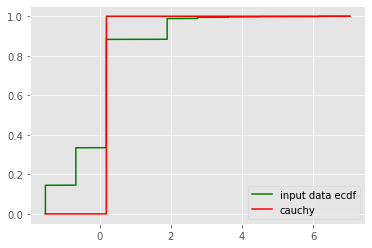

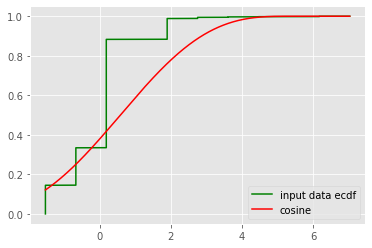

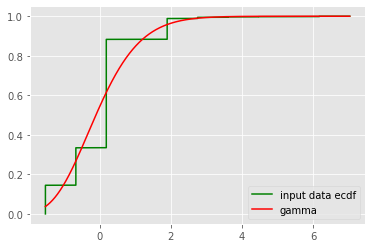

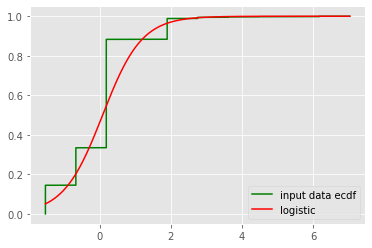

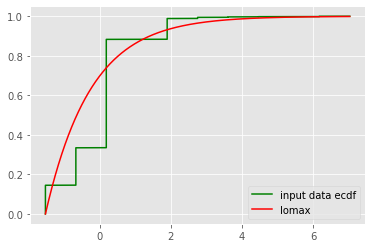

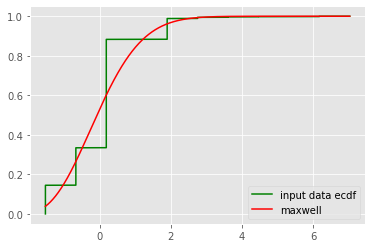

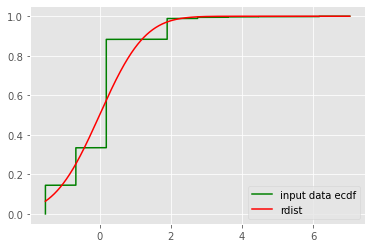

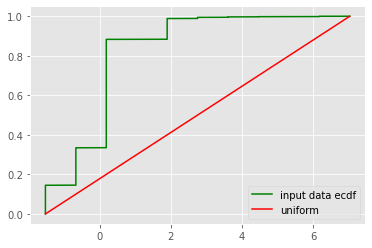

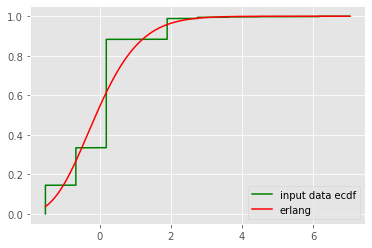

column: 10


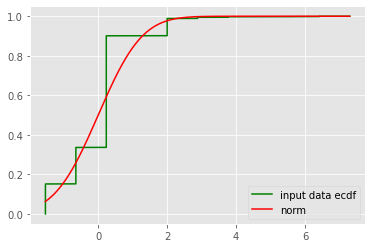

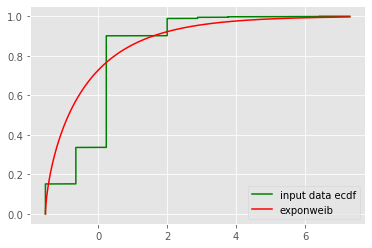

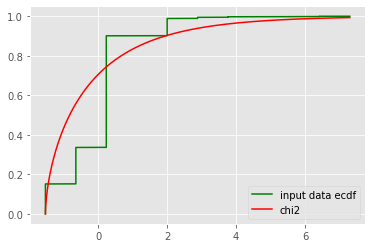

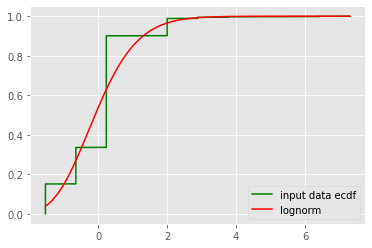

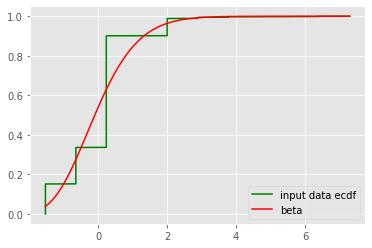

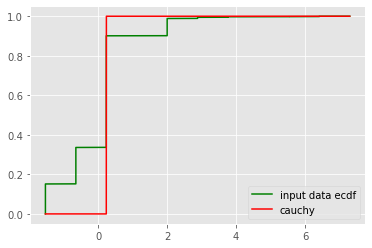

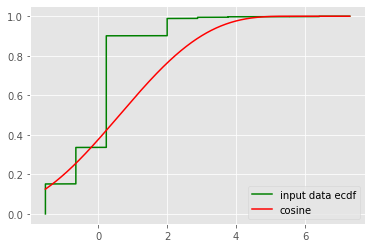

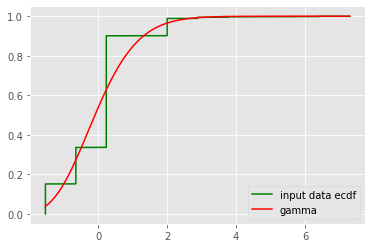

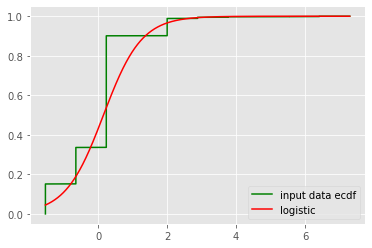

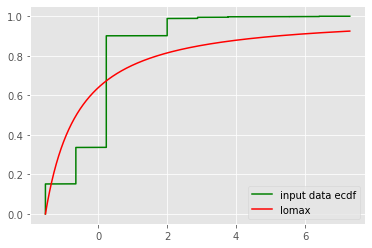

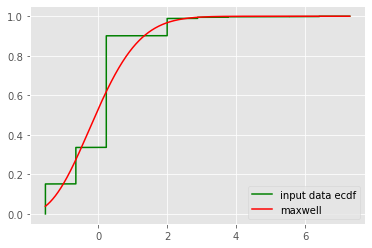

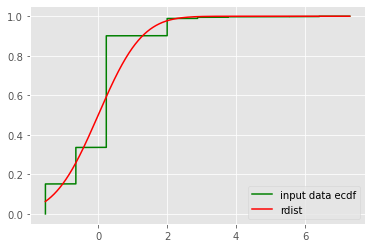

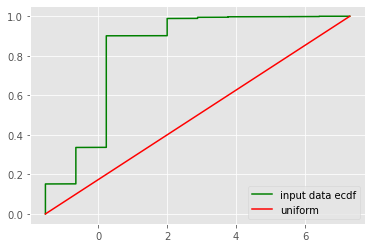

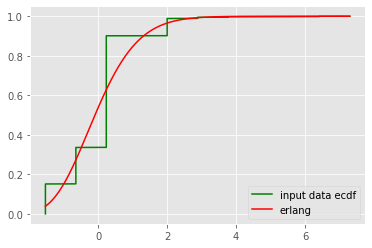

column: 11


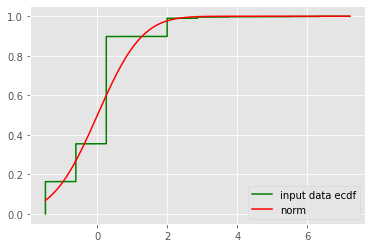

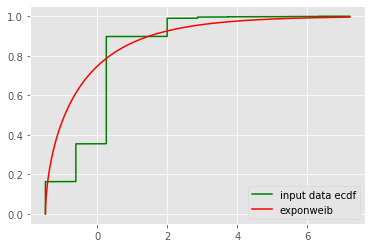

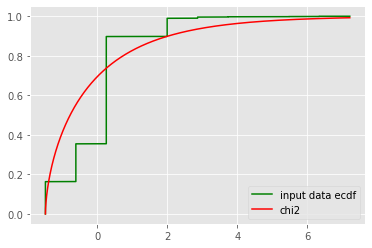

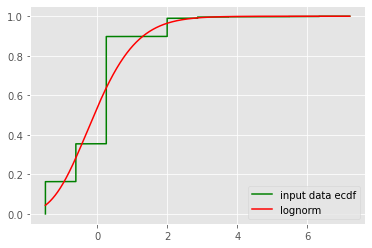

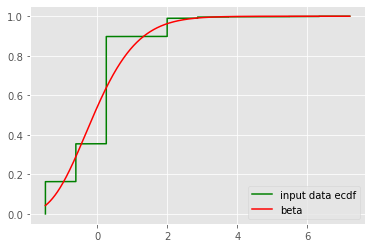

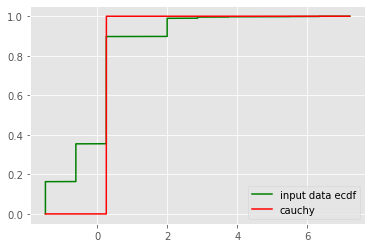

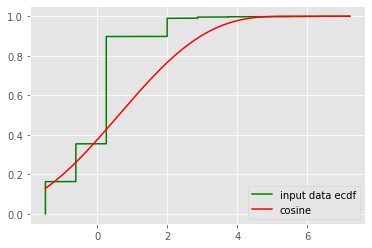

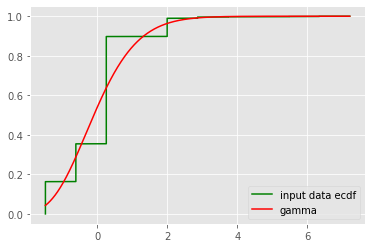

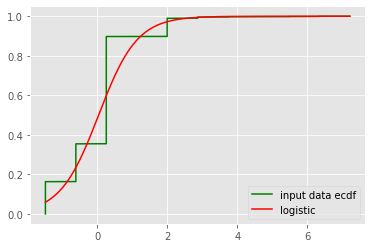

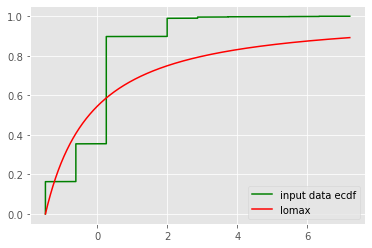

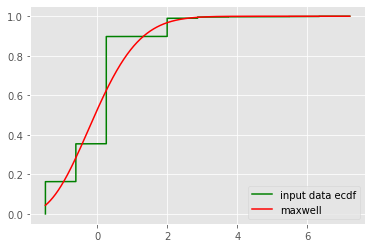

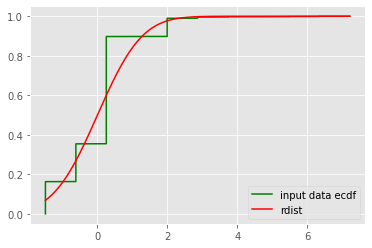

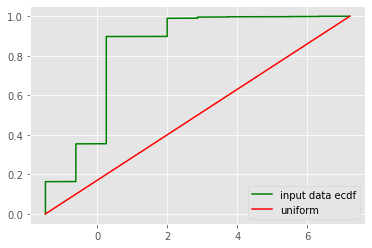

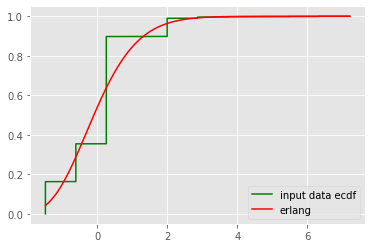

column: 12


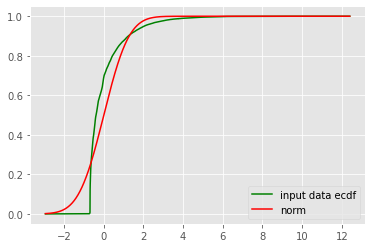

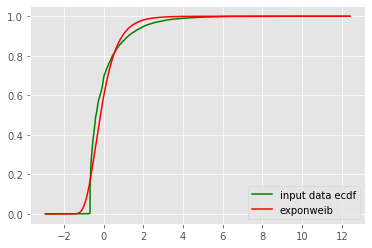

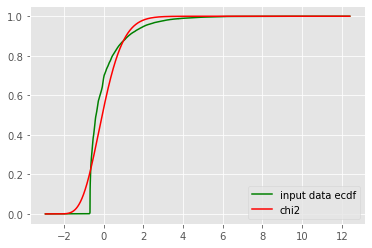

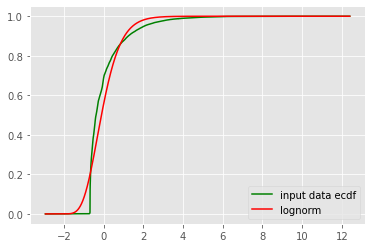

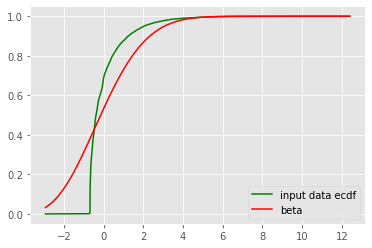

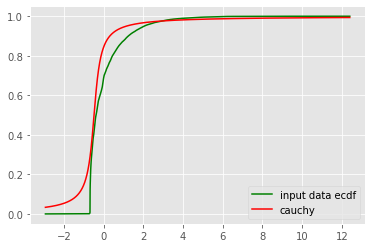

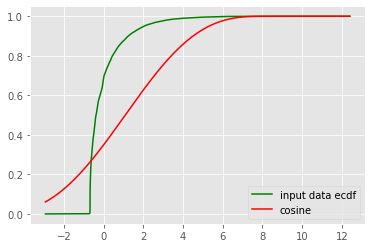

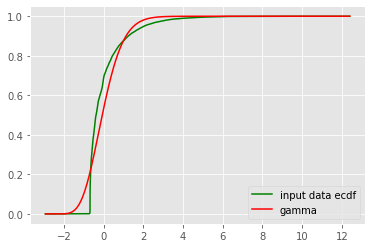

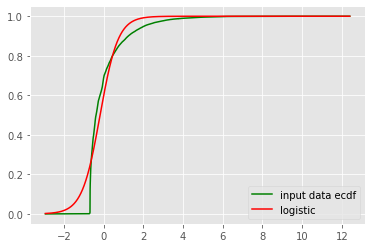

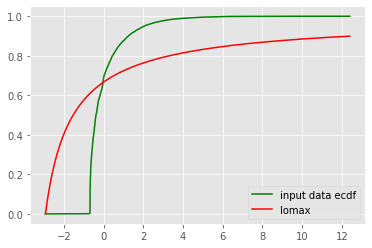

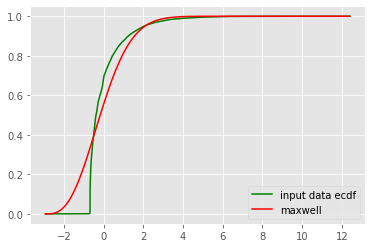

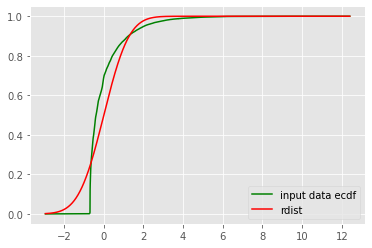

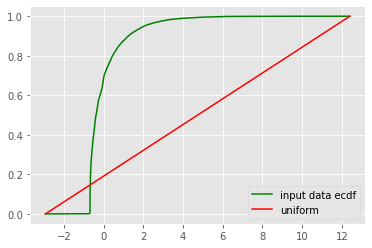

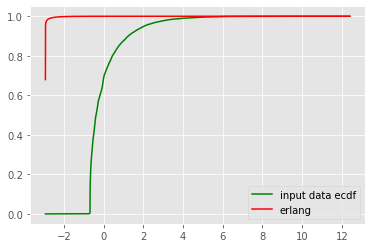

column: 13


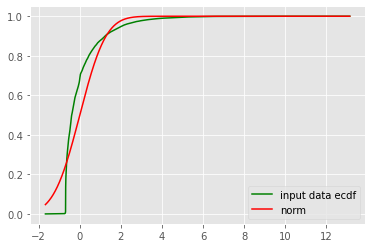

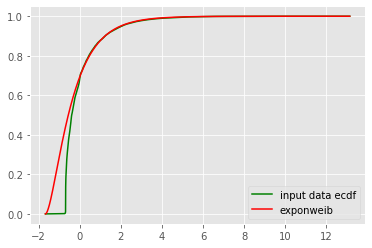

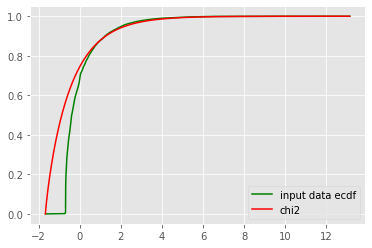

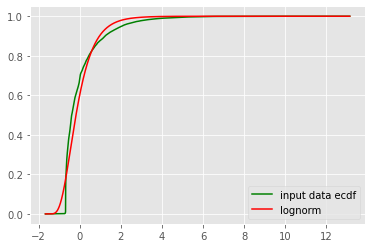

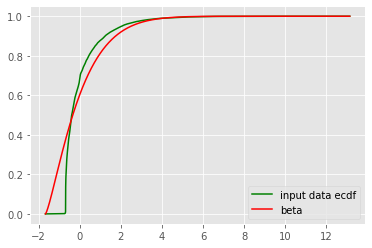

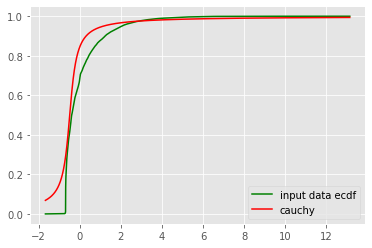

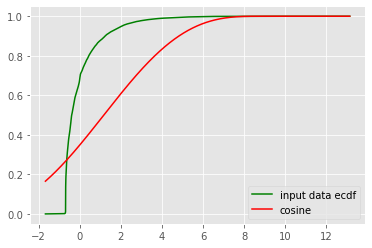

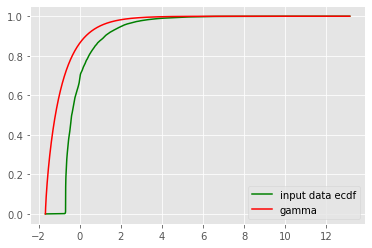

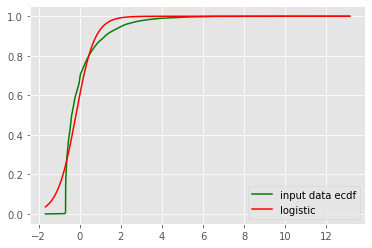

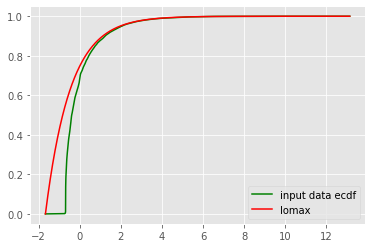

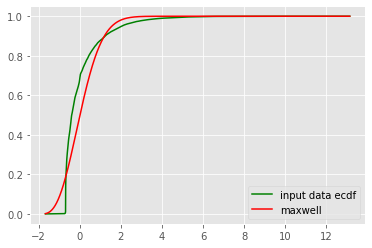

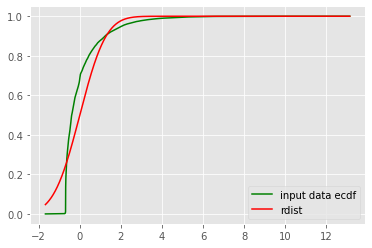

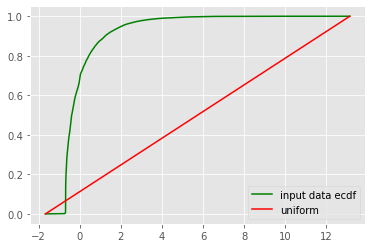

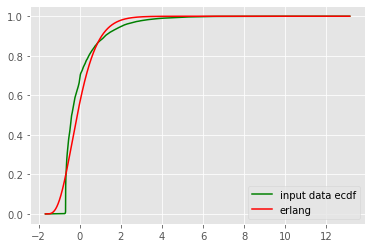

column: 14


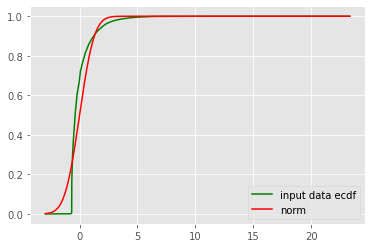

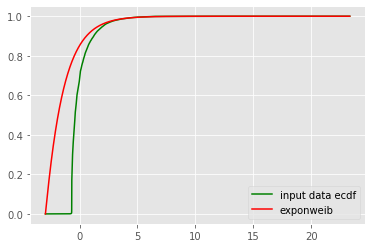

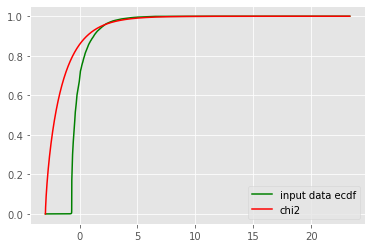

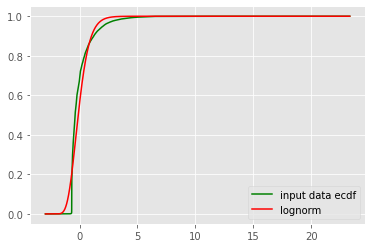

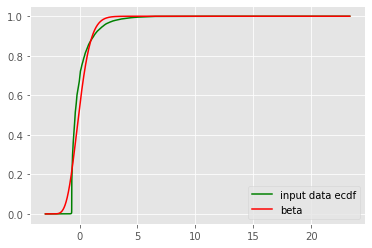

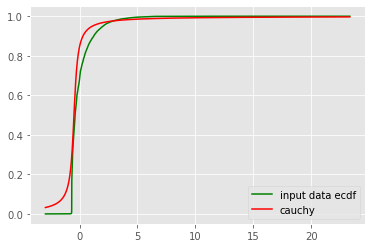

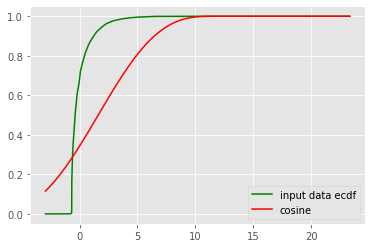

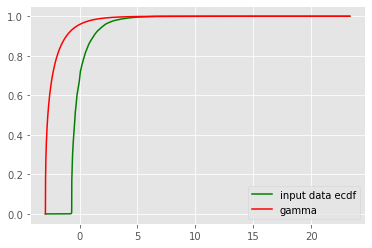

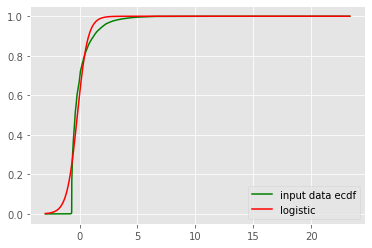

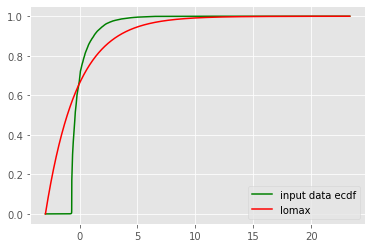

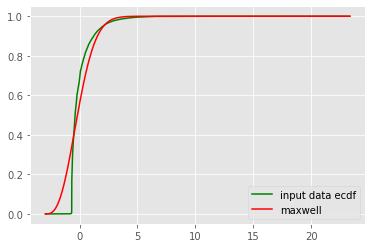

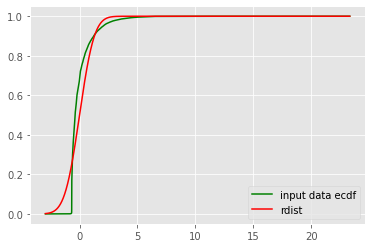

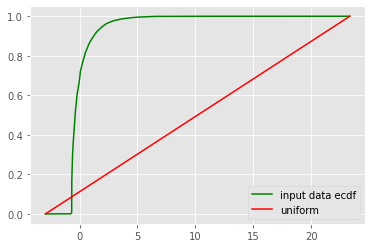

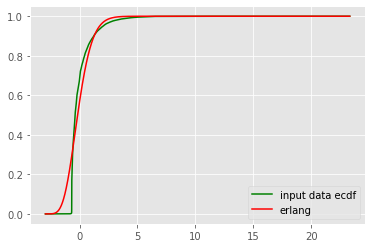

column: 15


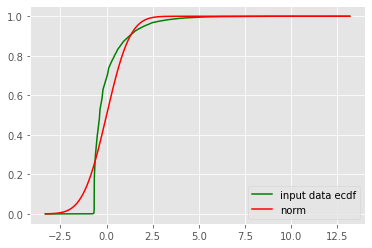

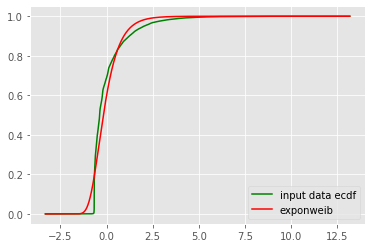

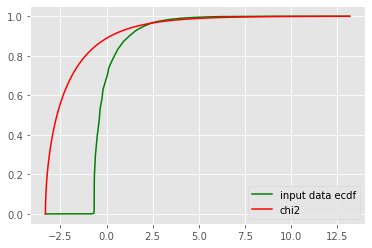

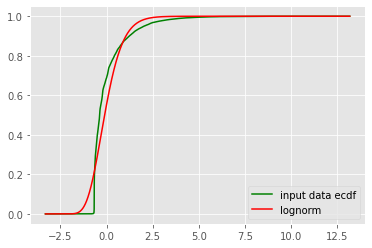

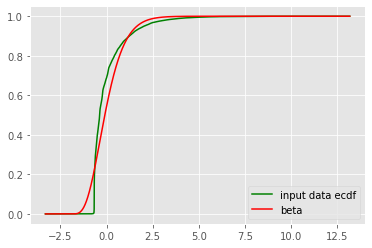

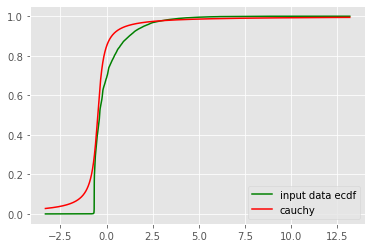

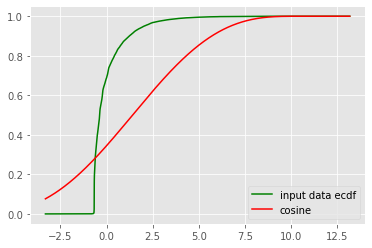

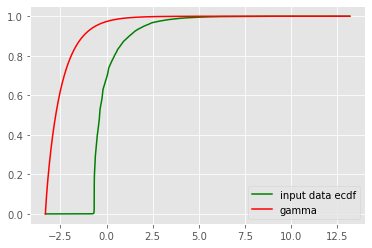

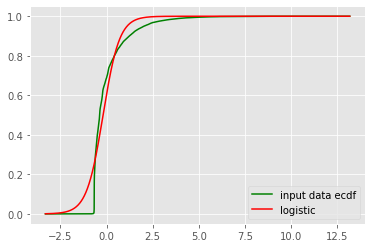

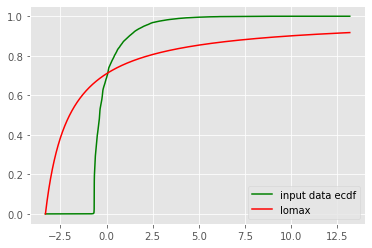

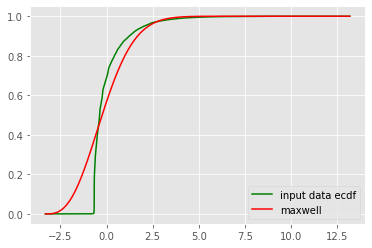

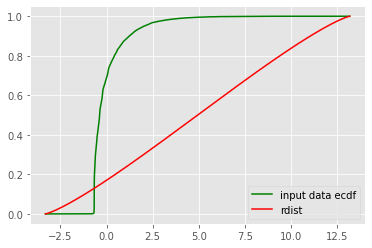

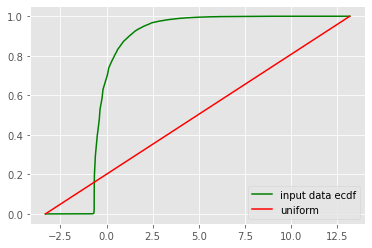

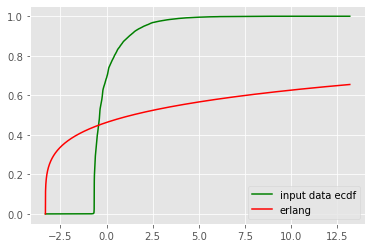

column: 16


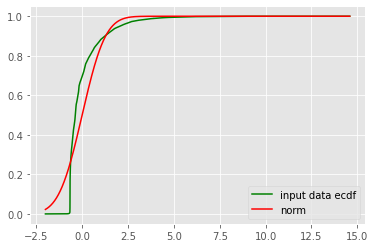

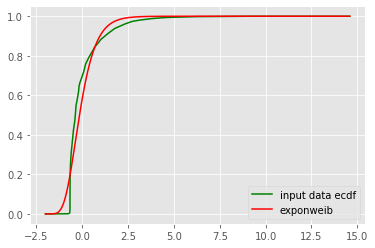

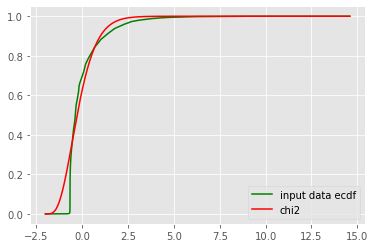

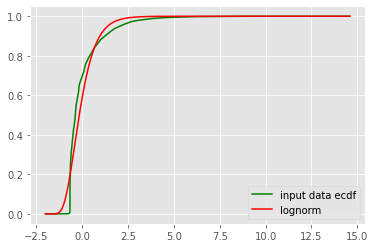

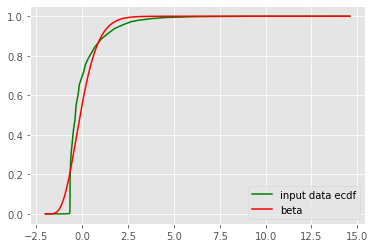

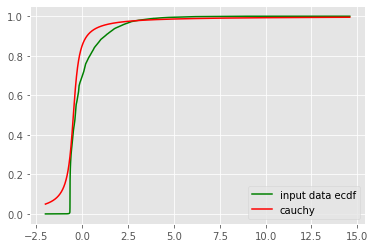

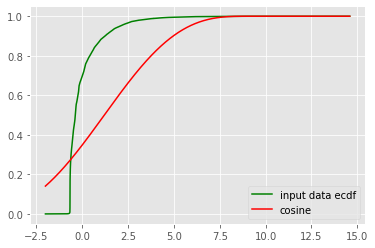

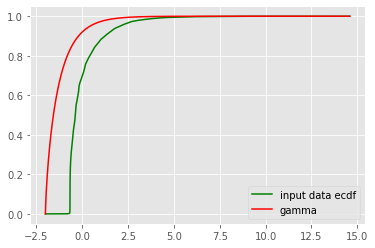

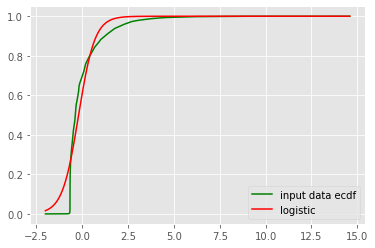

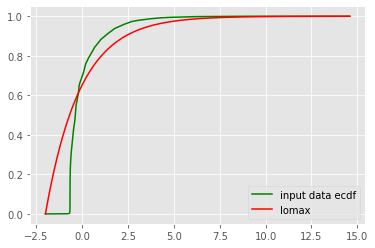

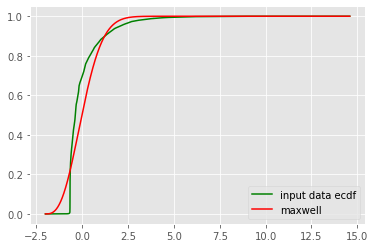

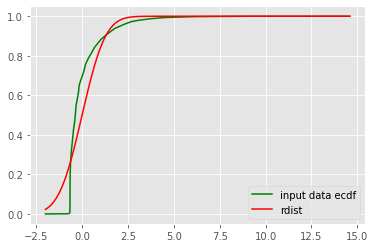

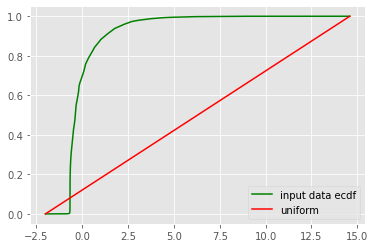

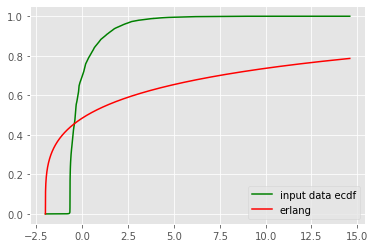

column: 17


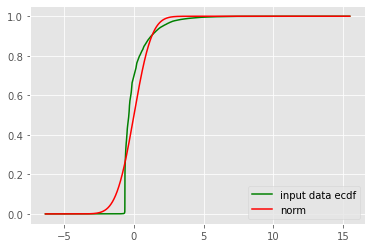

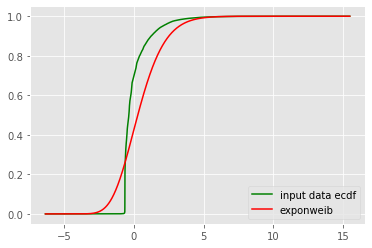

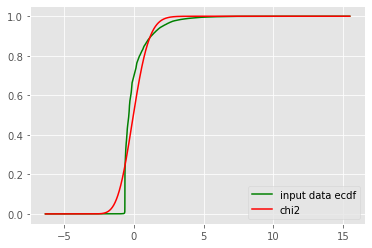

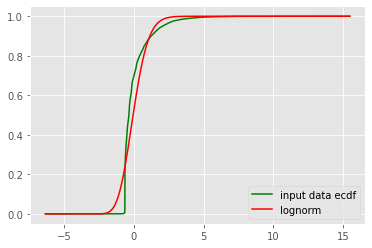

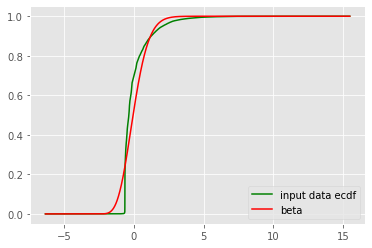

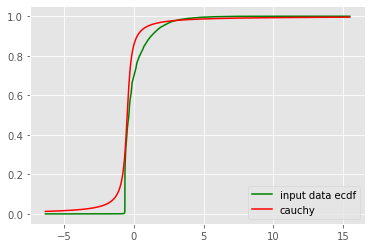

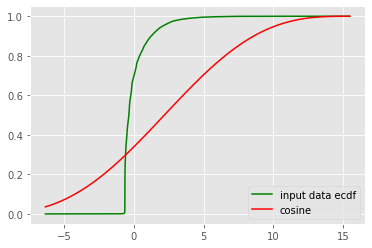

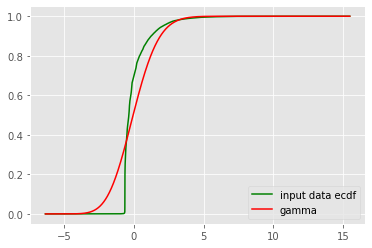

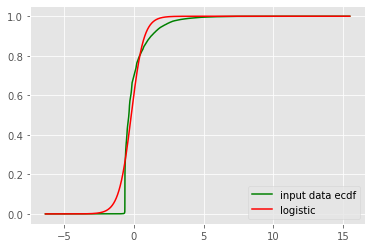

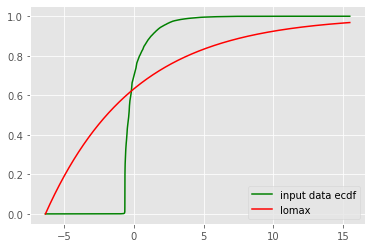

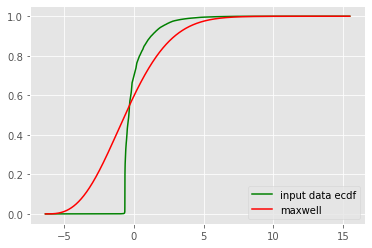

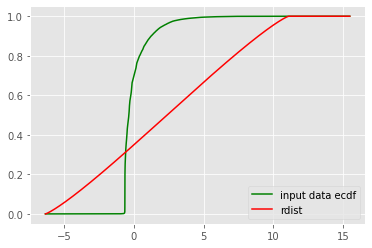

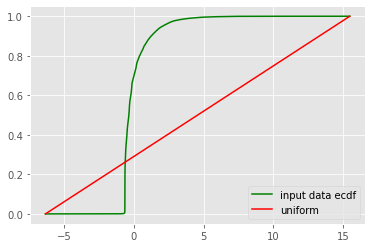

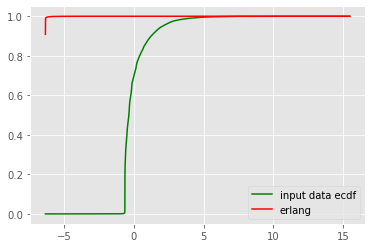

column: 18


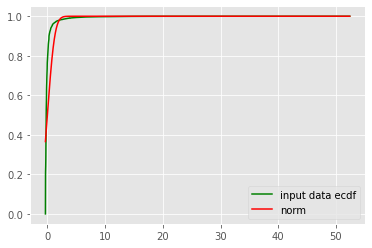

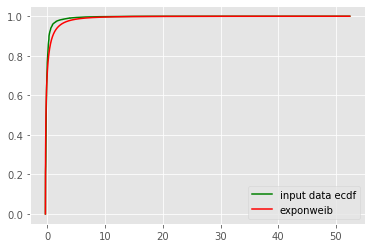

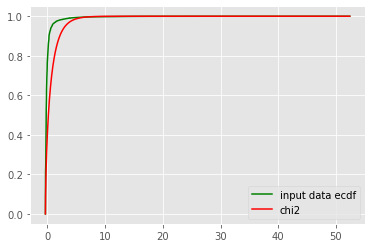

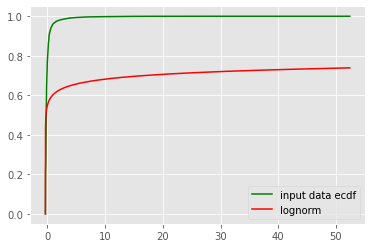

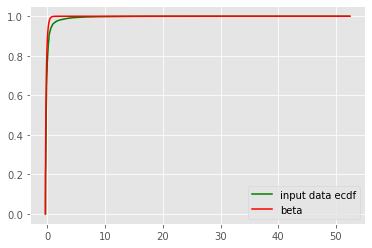

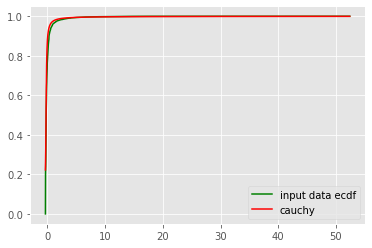

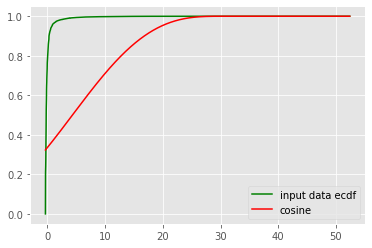

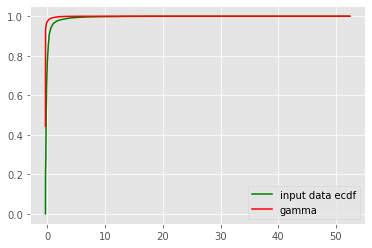

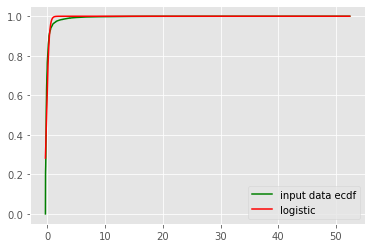

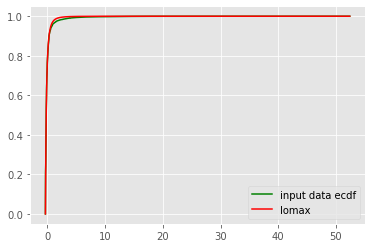

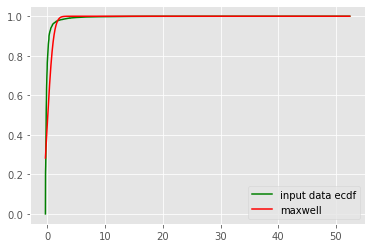

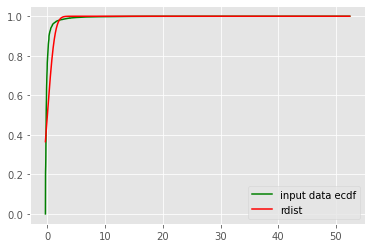

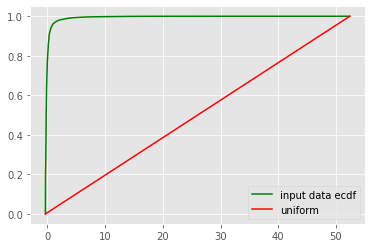

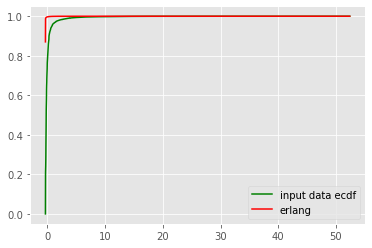

column: 19


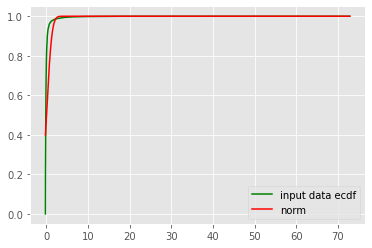

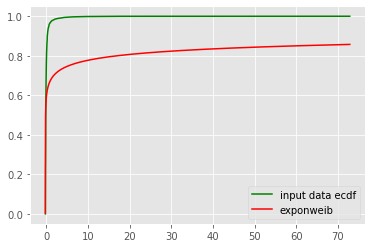

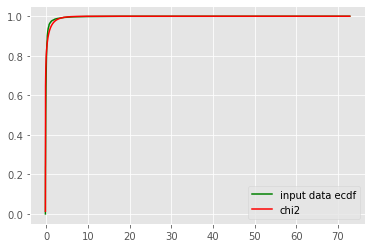

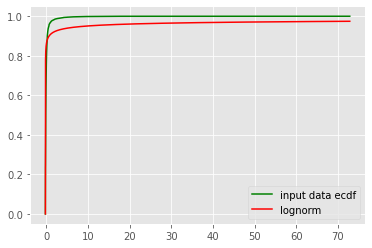

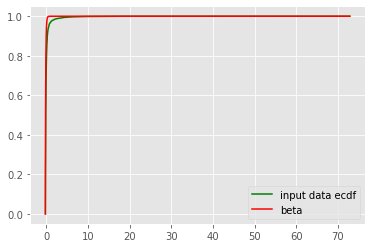

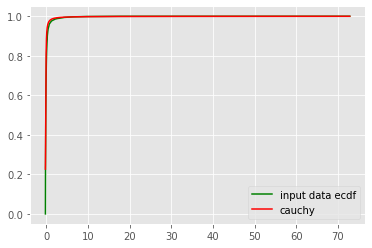

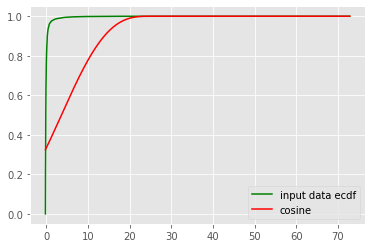

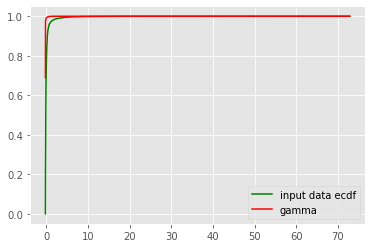

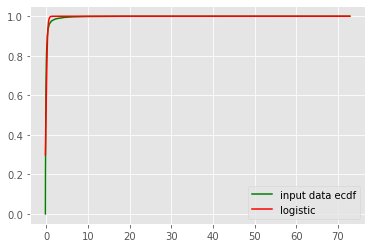

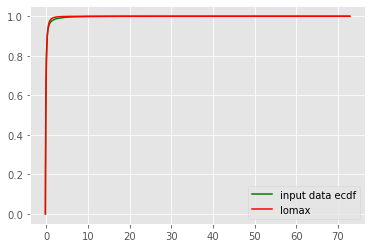

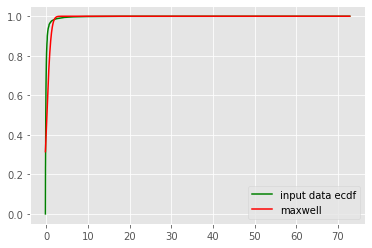

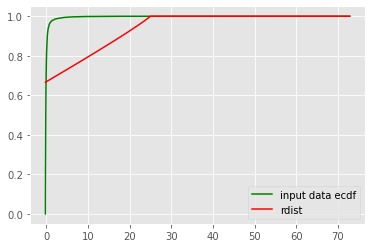

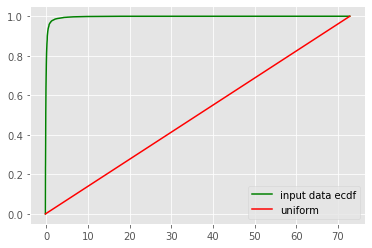

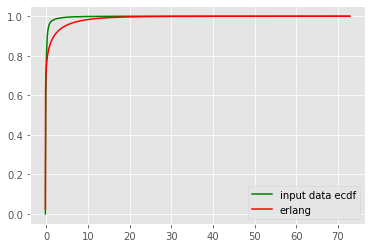

column: 20


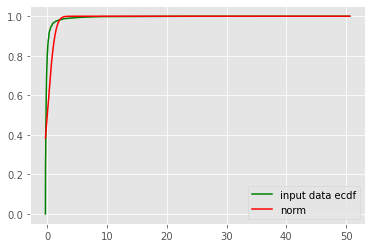

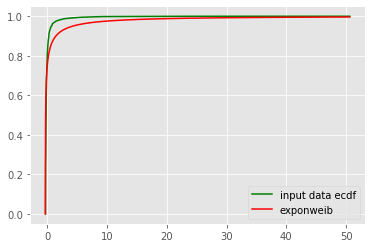

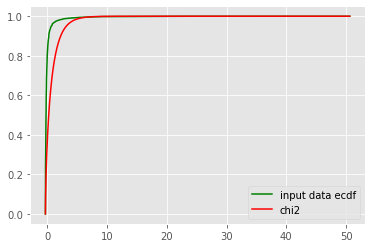

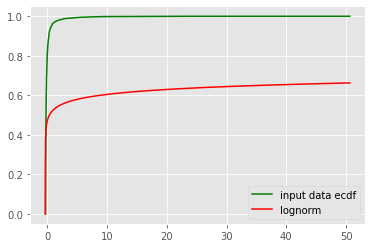

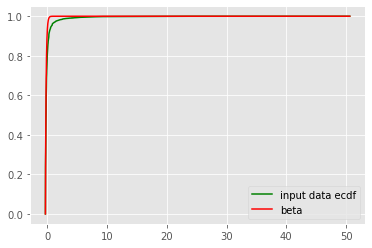

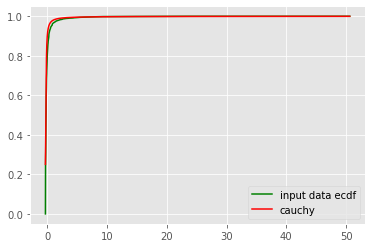

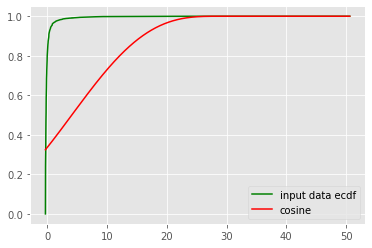

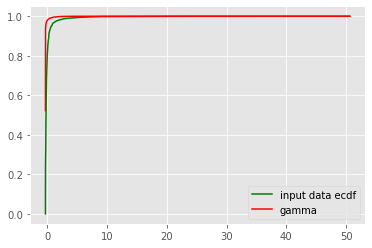

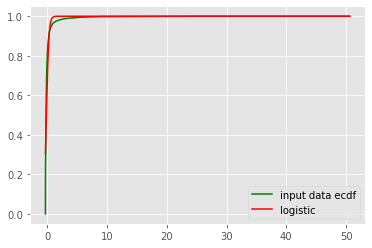

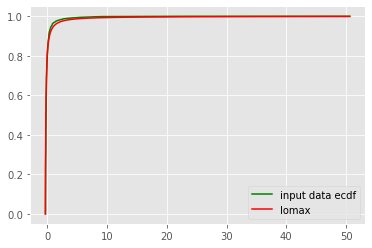

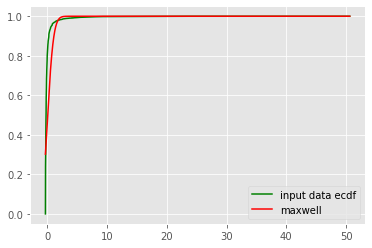

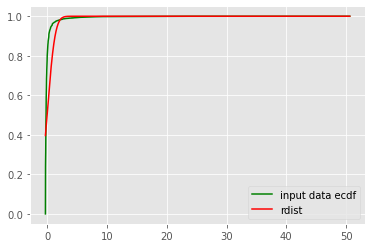

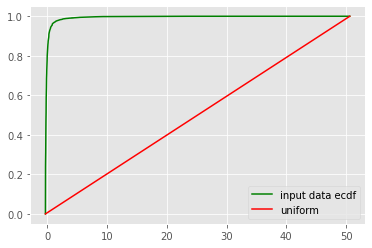

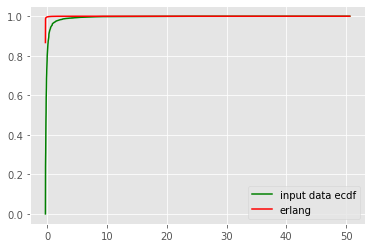

column: 21


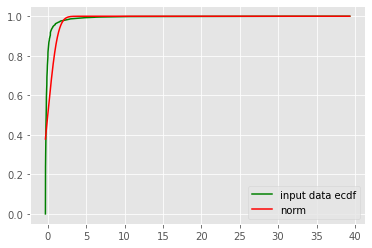

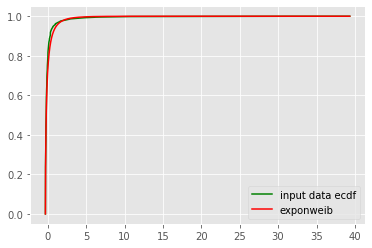

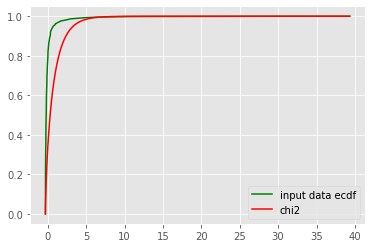

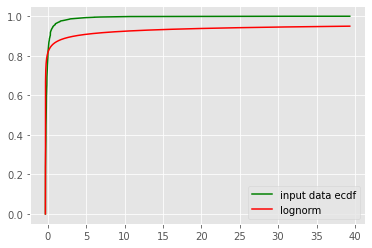

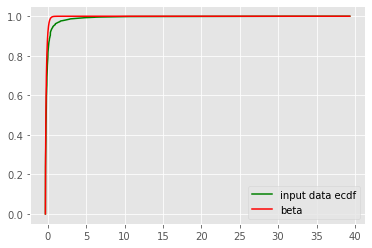

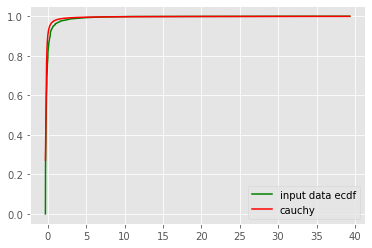

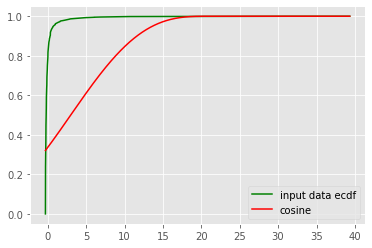

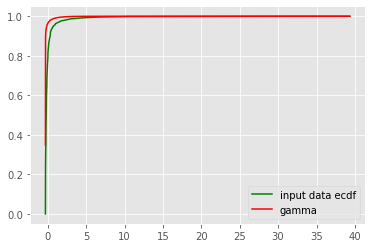

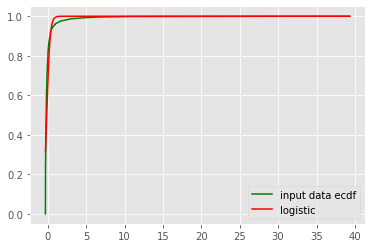

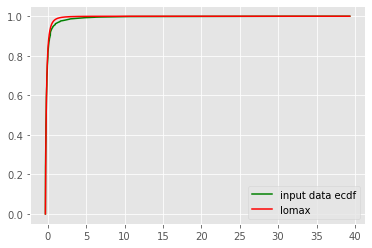

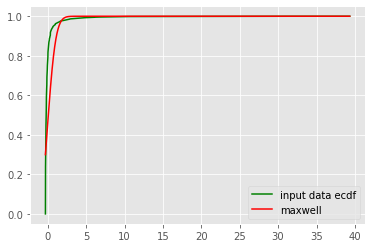

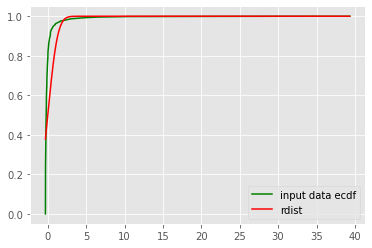

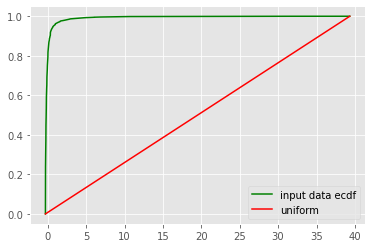

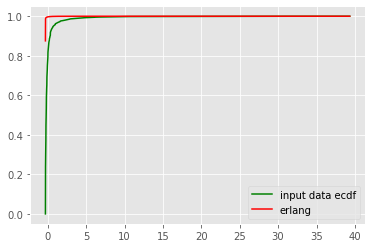

column: 22


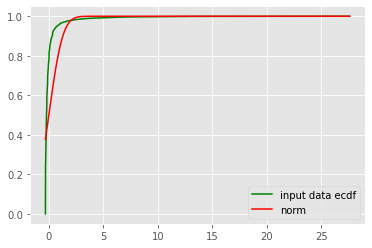

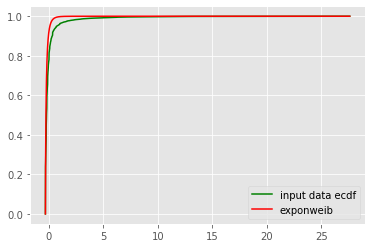

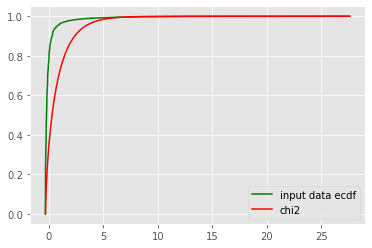

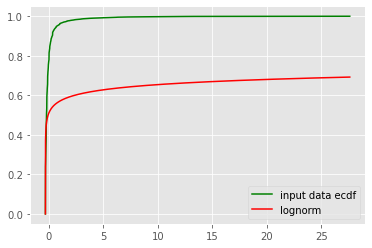

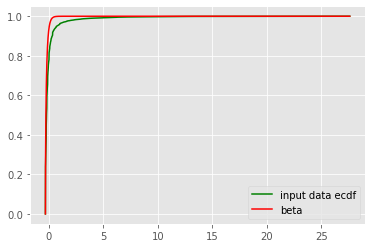

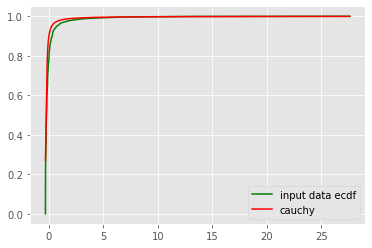

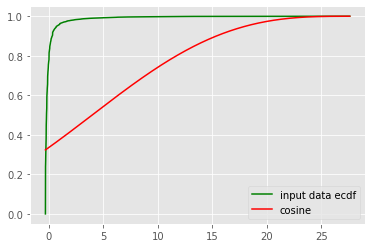

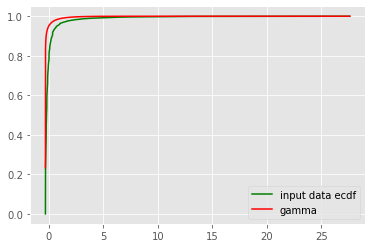

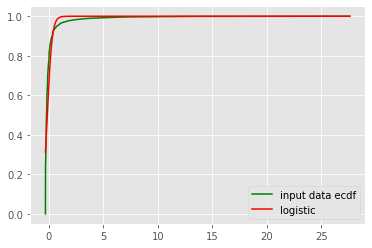

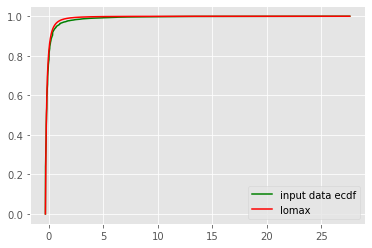

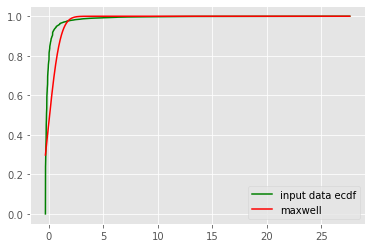

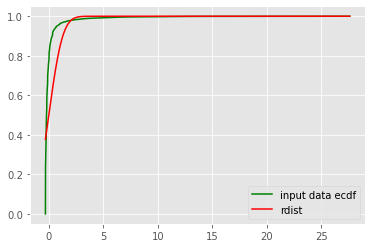

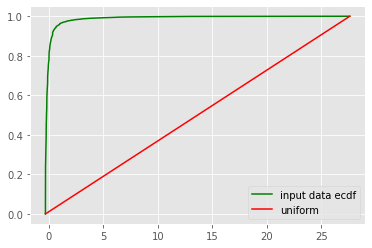

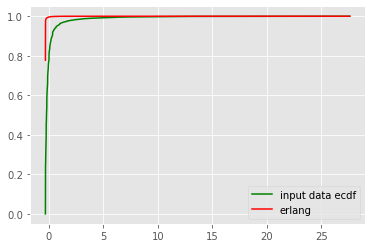

column: 23


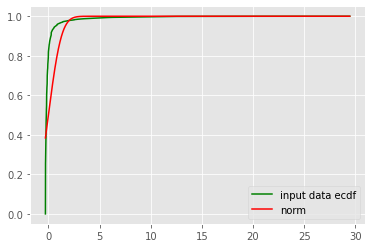

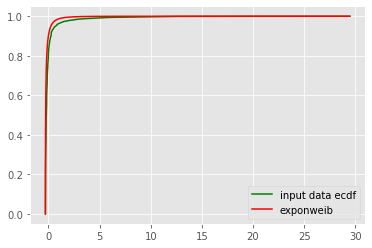

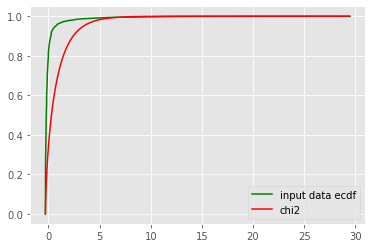

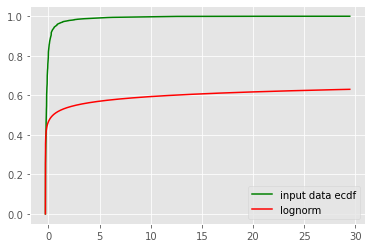

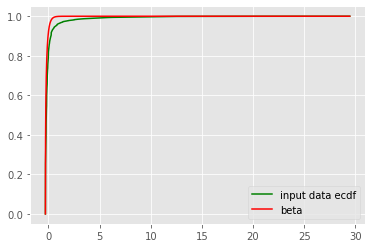

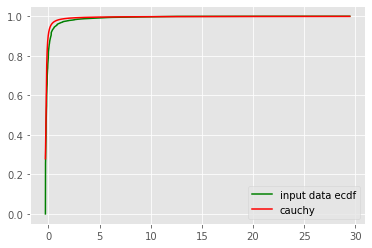

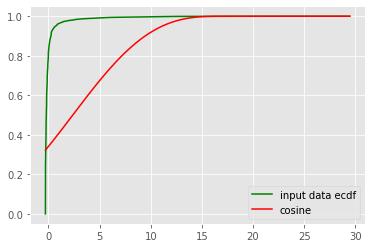

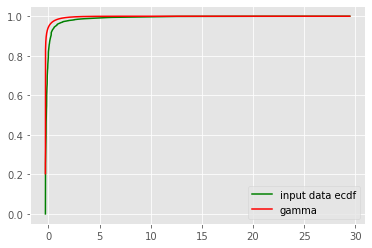

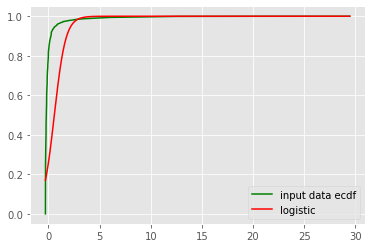

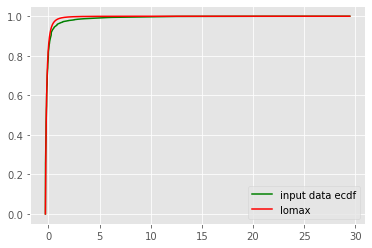

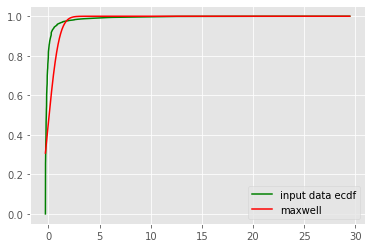

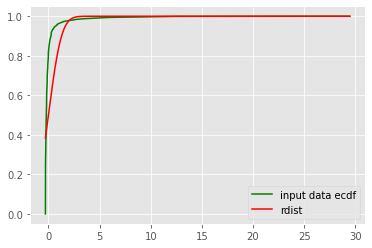

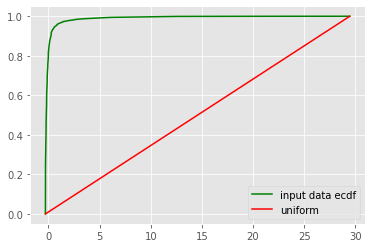

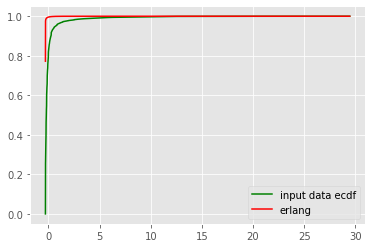

In [2]:
p_val = [0] * 23
q_val = [''] * 23
D_val = [100000] * 23


dist_names = ['norm',
              'exponweib',
              'chi2',
              'lognorm',
              'beta',
              'cauchy',
              'cosine',
              'gamma',
              'logistic',
              'lomax',
              'maxwell',
              'rdist',
              'uniform', 
              'erlang']

for i in range(1,24):
        print("column:", i)
        #standardization
        #sorted_data = np.sort(data[data.columns[i]], axis =0)
        sorted_data = data[data.columns[i]]
        scaled = ((sorted_data-sorted_data.mean())/sorted_data.std())
        y_std= scaled
        emperical = [(1 + i) / len(y_std) for i in range(len(y_std))]
        t = np.linspace(min(y_std), max(y_std),30000)

        
        for distribution in dist_names:
            
        
            dist = getattr(scipy.stats, distribution)
            param = dist.fit(y_std) #parameter fitting for kstest
            d,p = scipy.stats.kstest(y_std, distribution, args=param)
            #plotting cdf of distribution and data for testing purposes
            plt.plot(np.sort(y_std),emperical, color = 'g', label = 'input data ecdf')
            plt.plot(t,getattr(scipy.stats, distribution).cdf(t,*param[:-2], loc=param[-2], scale=param[-1]), color = 'r', label = distribution)
            plt.legend()
            plt.show()
            
            #finding best suited distribution based on d value of kstest
            if D_val[i-1]>d:
                p_val[i-1] = p
                D_val[i-1] = d
                q_val[i-1] = distribution
                
        #fitting and ordering of data 
        distb = getattr(scipy.stats, q_val[i-1])
        param1 = distb.fit(y_std)
        temp = distb.rvs(*param1[:-2], loc=param1[-2], scale=param1[-1], size = 30000)
        sort_temp = np.sort(temp)
        idx = np.argsort(data[data.columns[i]]) 
        b_new = [0]*len(sort_temp)
           
        for index in range(0,len(sort_temp)):
                b_new[idx[index]] = sort_temp[index]
        
        data_rec[data.columns[i]] = b_new
        
                
                
                

In [3]:
p_val

[8.085896115219048e-125,
 0.0,
 0.0,
 0.0,
 4.377574595137326e-40,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [4]:
q_val

['erlang',
 'exponweib',
 'norm',
 'cosine',
 'beta',
 'logistic',
 'lognorm',
 'erlang',
 'gamma',
 'maxwell',
 'maxwell',
 'exponweib',
 'lognorm',
 'lognorm',
 'exponweib',
 'lognorm',
 'lognorm',
 'lomax',
 'lomax',
 'lomax',
 'beta',
 'beta',
 'beta']

In [5]:
data

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 25 columns]

In [6]:
data_rec

LIMIT_BAL           SEX  EDUCATION  MARRIAGE       AGE     PAY_0  \
0      -1.171565  1.853580e+12  -0.227299 -2.550470 -1.268501  1.418882   
1      -0.421098 -1.179573e+00   0.422143  0.384526 -1.000757 -0.555043   
2      -0.586278 -1.179565e+00   0.422132  0.384287 -0.160724  0.425310   
3      -0.803208 -1.179539e+00   0.422048 -0.324032  0.130794  0.425199   
4      -0.803280 -1.234290e+00   0.421939 -0.323786  2.316353 -0.559438   
...          ...           ...        ...       ...       ...       ...   
29995   0.330305 -1.234302e+00   1.382826 -0.938791  0.410379 -0.403177   
29996  -0.281608 -1.234302e+00   1.379110  0.384613  0.736426 -0.553077   
29997  -1.046376 -1.234302e+00  -0.095782  0.384929  0.133790  2.850992   
29998  -0.697848 -1.234302e+00   0.944977 -2.050195  0.518035  0.917061   
29999  -0.851290 -1.234302e+00   0.581633 -0.573155  1.095797  0.005009   

          PAY_2     PAY_3     PAY_4     PAY_5  ...  BILL_AMT3  BILL_AMT4  \
0      1.674586 -0.736769 -0.720439 -2.294426  ...  -0.739470  -1.114596   
1      1.065041  0.378418  0.409094  0.472301  ...  -0.574501  -0.527592   
2      0.658422  0.378364  0.409061  0.472258  ...  -0.276701  -0.277612   
3      0.658565  0.378307  0.409008  0.472241  ...   0.302388  -0.004474   
4      0.658668 -0.527073  0.408906  0.472185  ...   0.121735  -0.114220   
...         ...       ...       ...       ...  ...        ...        ...   
29995 -0.219388 -0.451279 -0.328056 -0.418166  ...   1.601907   0.657436   
29996 -0.556480 -0.522313 -0.603803 -0.413982  ...  -0.540013  -0.384947   
29997  2.870236  1.070489 -0.603746 -0.414761  ...  -0.571236  -0.114862   
29998 -0.547213  0.741617  0.879703  0.744164  ...   0.593393   0.326169   
29999  0.049219  0.567466  0.959095  0.686418  ...   0.314828   0.117423   

       BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  \
0      -1.098420  -1.279422 -0.341933 -0.225000 -0.296790 -0.308057 -0.314131   
1      -0.492472  -0.462075 -0.311267 -0.219117 -0.255108 -0.265535 -0.305839   
2      -0.226607  -0.095864 -0.256713 -0.197746 -0.255145 -0.265478 -0.284489   
3       0.072943   0.271640 -0.226674 -0.165677 -0.246307 -0.261020 -0.281762   
4      -0.128133   0.014191 -0.229967  0.814296  0.384538 -0.031718 -0.296031   
...          ...        ...       ...       ...       ...       ...       ...   
29995   0.133702  -0.085405  0.149512  0.452490 -0.020222 -0.185281 -0.173451   
29996  -0.446937  -0.915818 -0.237473 -0.100931  0.261241 -0.294048 -0.305784   
29997  -0.068799   0.026079 -0.311316 -0.240235  1.577743 -0.153571 -0.258591   
29998  -0.279278   0.544592  2.047855 -0.106784 -0.246953 -0.237464  0.261553   
29999   0.145609  -0.101111 -0.206980 -0.185259 -0.236103 -0.268386 -0.286301   

       PAY_AMT6  
0     -0.293377  
1     -0.244830  
2     -0.149556  
3     -0.273184  
4     -0.282691  
...         ...  
29995 -0.278108  
29996 -0.289526  
29997 -0.210967  
29998 -0.256669  
29999 -0.275376  

[30000 rows x 23 columns]

In [7]:
data_rec["Default"] = data["default.payment.next.month"]
data.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
data.drop('ID', axis = 1, inplace =True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_0      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [8]:
y = data.Default     # target default=1 or non-default=0
features = data.drop('Default', axis = 1, inplace = False)
data['EDUCATION']=np.where(data['EDUCATION'] == 5, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 6, 4, data['EDUCATION'])
data['EDUCATION']=np.where(data['EDUCATION'] == 0, 4, data['EDUCATION'])
data['MARRIAGE']=np.where(data['MARRIAGE'] == 0, 3, data['MARRIAGE'])
data['MARRIAGE'].unique()


In [9]:
# Original dataset
X = data.drop('Default', axis=1)  
y = data['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)


# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 150, 'max_features': 5, 'max_depth': 6, 'criterion': 'gini'}


Accuracy: 0.8171666666666667

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.67      6000
weighted avg       0.80      0.82      0.79      6000


Average 5-Fold CV Score: 0.8203 , Standard deviation: 0.0093


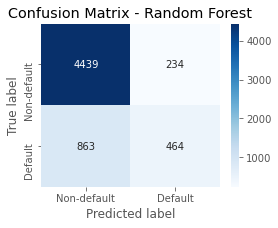

In [10]:
Ran = RandomForestClassifier(criterion= 'gini', max_depth= 6, 
                                     max_features= 5, n_estimators= 150, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest")

In [ ]:
#training on recreated data
X = data_rec.drop('Default', axis=1)  
y = data_rec['Default']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)


# Create the random grid
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(X, y)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Accuracy: 0.8176666666666667

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.67      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000


Average 5-Fold CV Score: 0.8195 , Standard deviation: 0.0086


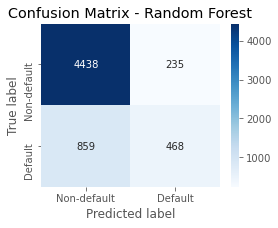

In [13]:
Ran = RandomForestClassifier(criterion= 'entropy', max_depth= 5, 
                                     max_features= 6, n_estimators= 200, 
                                     random_state=0)
Ran.fit(X_train, y_train)
y_pred = Ran.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(Ran, X, y, cv=5)

# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,Ran.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Random Forest");

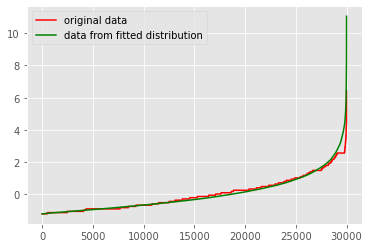

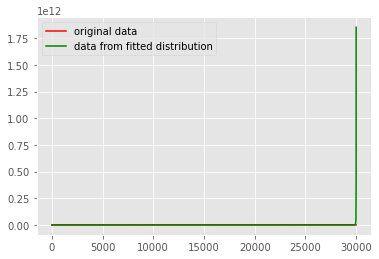

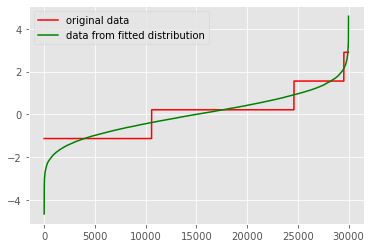

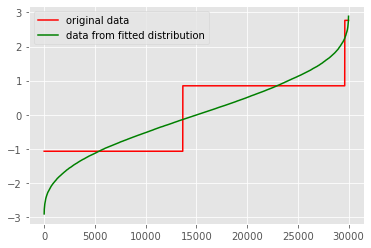

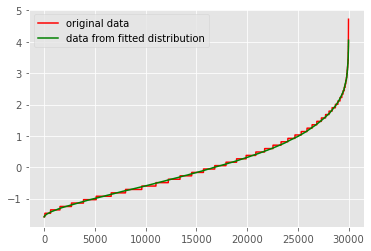

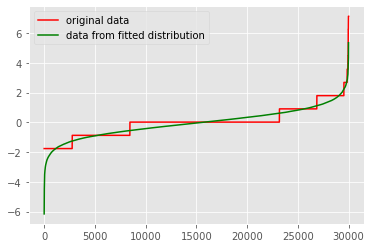

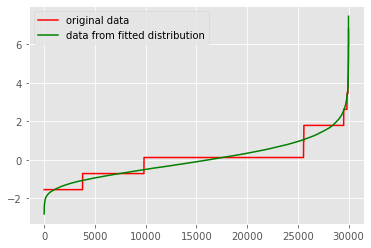

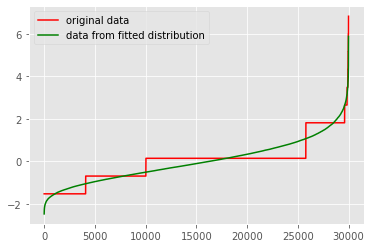

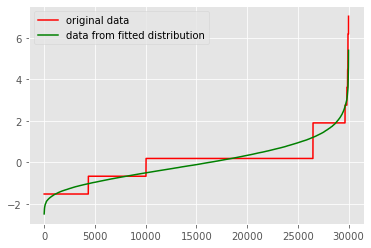

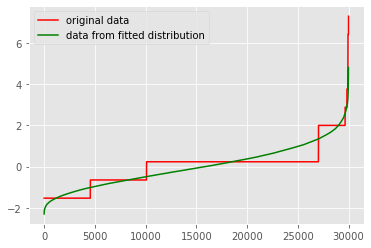

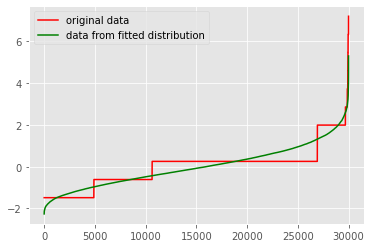

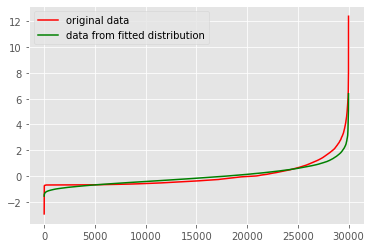

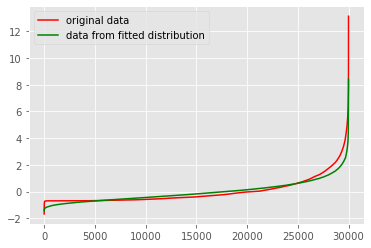

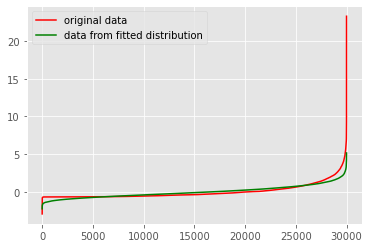

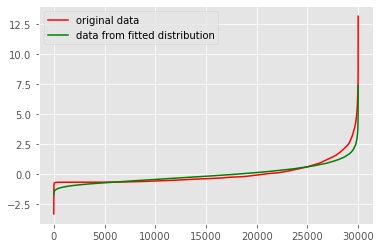

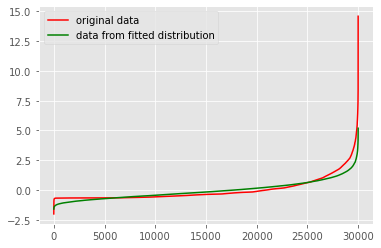

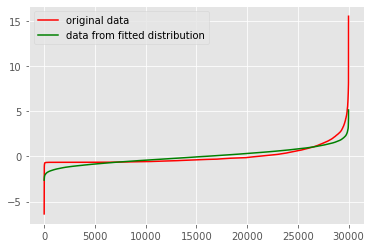

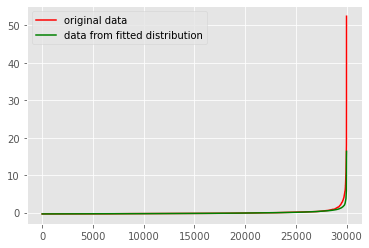

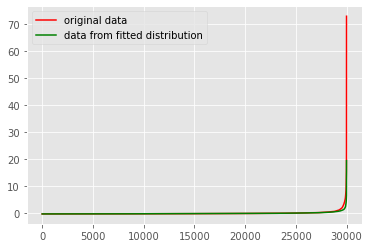

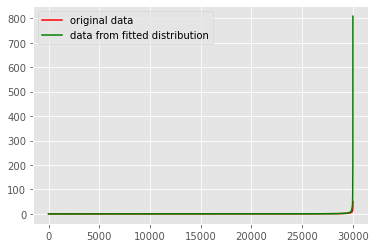

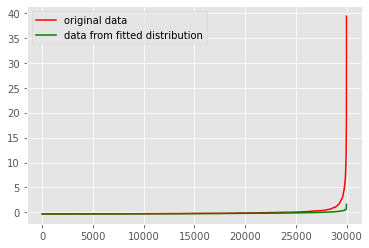

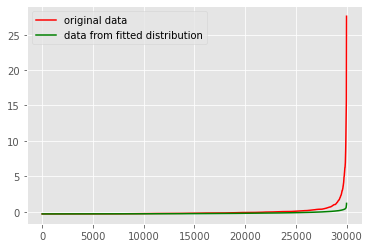

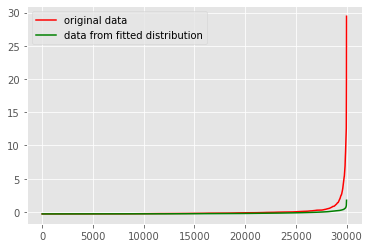

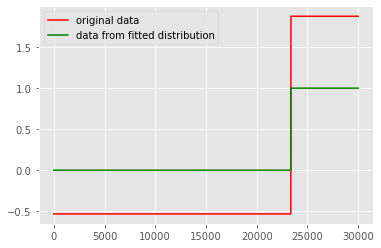

In [14]:
for column in data:
    sorted_data = np.sort(data[column])
    scaled = ((sorted_data-sorted_data.mean())/sorted_data.std())
    plt.plot(scaled, color = 'r', label = 'original data')
    plt.plot(np.sort(data_rec[column]), color = 'g', label = 'data from fitted distribution')
    plt.legend()
    plt.show()